<a href="https://colab.research.google.com/github/jungry/time_series/blob/main/Forecasting_Passangers_to_Jeju_Airport.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Time Series Data Analysis Project

# **Forecasting Passangers to Jeju Airport**

Team:
9073820244 Albina Syla,
2022080537 Lydia,
2022084339 Yun Donghyun,
2022016326 Jung Hyunsu





# **0.0 Initialization**




In [ ]:
# Google Mount
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np


In [ ]:
# DATA File paths
# ATTENTION: YOU NEED TO CHANGE THE DIRECTORY TO YOUR OWN FILE POSITION!

weather_data_path = "/content/drive/My Drive/OBS_ASOS_MNH_20241031132201.csv"
passenger_data_path = "/content/drive/My Drive/시계열 통계_20241102.xlsx"
esi_data_path = "/content/drive/My Drive/경제심리지수(ESI).xlsx"
gdp_data_path = "/content/drive/My Drive/GDP_excel.xlsx"
export_cvs_path = "/content/drive/My Drive/"

# **0.1 Preparing the Data**


## 0.1.0 Preparing the Weather Data

This weather data is provided by The Korea Meteorological Administration.
It contains a lot of datapoints about the weather in Jeju.
Here we prepare the data to fit an appropriate format and translate the Korean Headers to English.

In [ ]:
#PREPARING WEATHER DATA

# if necessary please install translation package:
!pip install deep-translator
from deep_translator import GoogleTranslator as translator

# Load Weather data
# ATTENTION: YOU NEED TO CHANGE THE DIRECTORY TO YOUR OWN FILE POSITION!)
weather_df = pd.read_csv(weather_data_path, encoding='cp949')

# Translate headers to english
translator = translator(source='auto', target='en')
weather_df.columns = [translator.translate(col) for col in weather_df.columns]


# Convert date
weather_df['date'] = pd.to_datetime(weather_df['date'])
weather_df.set_index('date', inplace=True)
weather_df.index = weather_df.index.to_period('M')

# Only keep weather from Jeju
weather_df = weather_df[weather_df[weather_df.columns[1]] == '제주']

# Remove unneccessary columns
print("Columns in the DataFrame and their indices:", '\n')
print(weather_df.info())

cols_to_drop = [0, 1, 7, 8, 13, 14, 18, 19, 28, 29, 30, 35, 36 //
                40, 41, 42, 43, 44, 52, 53 , 57]


weather_df.drop(weather_df.columns[cols_to_drop], axis=1, inplace=True)


weather_df.head()


Columns in the DataFrame and their indices: 

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 241 entries, 2004-01 to 2024-01
Freq: M
Data columns (total 68 columns):
 #   Column                                                                                Non-Null Count  Dtype  
---  ------                                                                                --------------  -----  
 0   spot                                                                                  241 non-null    int64  
 1   Branch name                                                                           241 non-null    object 
 2   Average temperature (°C)                                                              241 non-null    float64
 3   Average High Temperature (°C)                                                         241 non-null    float64
 4   Average minimum temperature (°C)                                                      241 non-null    float64
 5   Highest temperature 

<ipython-input-138-37e2cb906afb>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_df.drop(weather_df.columns[cols_to_drop], axis=1, inplace=True)


Average temperature (°C)  Average High Temperature (°C)  \
date                                                               
2004-01                       5.5                            8.4   
2004-02                       8.1                           12.4   
2004-03                      10.0                           14.2   
2004-04                      14.3                           18.5   
2004-05                      18.1                           22.1   

         Average minimum temperature (°C)  Highest temperature (°C)  \
date                                                                  
2004-01                               3.2                      13.6   
2004-02                               4.5                      24.5   
2004-03                               6.2                      23.9   
2004-04                              10.4                      25.6   
2004-05                              14.7                      30.8   

         Lowest temperature (°C)  Average local pressure (hPa)  \
date                                                             
2004-01                     -3.2                        1021.4   
2004-02                      0.8                        1018.7   
2004-03                      0.4                        1017.8   
2004-04                      5.0                        1012.0   
2004-05                      9.7                        1008.0   

         Mean sea level pressure (hPa)  Maximum sea level pressure (hPa)  \
date                                                                       
2004-01                         1024.2                            1032.4   
2004-02                         1021.5                            1031.2   
2004-03                         1020.6                            1035.1   
2004-04                         1014.8                            1024.2   
2004-05                         1010.7                            1020.3   

         Minimum sea level pressure (hPa)  Average vapor pressure (hPa)  ...  \
date                                                                     ...   
2004-01                            1018.0                           5.8  ...   
2004-02                            1007.0                           6.7  ...   
2004-03                            1009.3                           7.4  ...   
2004-04                             997.5                          10.3  ...   
2004-05                             998.9                          14.8  ...   

         Average ground temperature (°C)  0.05mAverage ground temperature(°C)  \
date                                                                            
2004-01                              5.1                                  5.9   
2004-02                              8.4                                  8.2   
2004-03                             11.6                                 11.1   
2004-04                             18.4                                 16.7   
2004-05                             21.9                                 20.9   

         0.1m average ground temperature (°C)  \
date                                            
2004-01                                   6.5   
2004-02                                   8.4   
2004-03                                  11.1   
2004-04                                  16.3   
2004-05                                  20.2   

         0.2m average ground temperature (°C)  \
date                                            
2004-01                                   7.4   
2004-02                                   8.8   
2004-03                                  11.2   
2004-04                                  16.2   
2004-05                                  20.0   

         0.3m average ground temperature (°C)  \
date                                            
2004-01                                   9.1   
2004-02                                   9.9   
2004-03                  

## 0.1.1 Preparing the Passenger Data

This data is provided by the Korea Airport Corporations.
It contains our target variable "Arriving Passengers to Jeju Airport". Here we prepare the data to fit our format.

In [ ]:
#PREPARING THE PASSENGER DATA

# Load passenger data
passengers_df = pd.read_excel(passenger_data_path, skiprows=7)

# Remove subtotal rows
passengers_df = passengers_df.dropna(subset=[passengers_df.columns[2]])

# Indexing by date
passengers_df[passengers_df.columns[2]] = passengers_df[passengers_df.columns[2]].astype(int)
passengers_df['date'] = passengers_df[passengers_df.columns[1]].astype(str) + '-' + passengers_df[passengers_df.columns[2]].astype(str)
passengers_df['date'] = pd.to_datetime(passengers_df['date'])
passengers_df = passengers_df.set_index('date')
passengers_df.index = passengers_df.index.to_period('M')

# Only keep target variable: Arriving Passangers to Jeju Airport
passengers_df.rename(columns={passengers_df.columns[6]: 'passengers'}, inplace=True)
passengers_df[passengers_df.columns[6]] = passengers_df[passengers_df.columns[6]].str.replace(',', '').astype(int)
passengers_df = passengers_df[passengers_df.columns[6]]
passengers_df.head()

date
2004-01    450451
2004-02    415499
2004-03    393108
2004-04    572705
2004-05    529027
Freq: M, Name: passengers, dtype: int64

## 0.1.2 Preparing the Economic Data

Here we prepare the Economic Data. We will use ESI, GDP and GDP Growth rate as variables.

Since the GDP data is provided quarterly, we turn it into monthly data by assigning the quarters to their months.

In [ ]:
# ESI Data

esi_df = pd.read_excel(esi_data_path, skiprows=6)

esi_df.rename(columns={esi_df.columns[0]: 'date'}, inplace=True)
esi_df.rename(columns={esi_df.columns[1]: 'esi'}, inplace=True)
#remove second var
esi_df = esi_df.iloc[:, :2]


esi_df = esi_df.set_index('date')
esi_df.index = pd.to_datetime(esi_df.index)
esi_df.index = esi_df.index.to_period('M')



esi_df.head()

esi
date          
2003-01  101.3
2003-02  102.6
2003-03   92.4
2003-04   98.2
2003-05   96.6

In [ ]:
# GDP Data

gdp_df = pd.read_excel(gdp_data_path, skiprows=2)

# Adjust Format
gdp_df = gdp_df.iloc[:2]
gdp_df = gdp_df.T

# Make first row header
gdp_df.columns = gdp_df.iloc[0]
gdp_df = gdp_df.iloc[1:]


# Turn Dataset from Quarterly to Monthly

gdp_df['year'] = gdp_df.index.str[:4]
gdp_df['quarter'] = gdp_df.index.str[4:5]
gdp_df['month'] = 'tbd'

gdp_first = gdp_df.copy()
gdp_second = gdp_df.copy()
gdp_third = gdp_df.copy()

# Iterate over rows in gdp_df and assign months based on the quarter
for index, row in gdp_df.iterrows():
    quarter = str(row['quarter'])
    if quarter == '1':
        gdp_first.loc[index, 'month'] = '01'
        gdp_second.loc[index, 'month'] = '02'
        gdp_third.loc[index, 'month'] = '03'
    elif quarter == '2':
        gdp_first.loc[index, 'month'] = '04'
        gdp_second.loc[index, 'month'] = '05'
        gdp_third.loc[index, 'month'] = '06'
    elif quarter == '3':
        gdp_first.loc[index, 'month'] = '07'
        gdp_second.loc[index, 'month'] = '08'
        gdp_third.loc[index, 'month'] = '09'
    elif quarter == '4':
        gdp_first.loc[index, 'month'] = '10'
        gdp_second.loc[index, 'month'] = '11'
        gdp_third.loc[index, 'month'] = '12'

gdp_df = pd.concat([gdp_first, gdp_second, gdp_third])

gdp_df['date'] = gdp_df['year'] + '-' + gdp_df['month']
gdp_df['date'] = pd.to_datetime(gdp_df['date'])
gdp_df = gdp_df.set_index('date')
gdp_df.index = gdp_df.index.to_period('M')
gdp_df.sort_index(inplace=True)


# Clean up Data Formats and unnecessary colums
gdp_df.drop(columns=['year', 'quarter', 'month'], inplace=True)
gdp_df.rename(columns={gdp_df.columns[0]: 'gdp'}, inplace=True)
gdp_df.rename(columns={gdp_df.columns[1]: 'gdp_growth'}, inplace=True)

gdp_df['gdp'] = gdp_df['gdp'].str.replace(',', '').astype(float)
gdp_df['gdp_growth'] = gdp_df['gdp_growth'].astype(float)

gdp_df.head()

Unnamed: 0       gdp  gdp_growth
date                            
2004-01     221439.0         5.7
2004-02     221439.0         5.7
2004-03     221439.0         5.7
2004-04     233988.7         6.6
2004-05     233988.7         6.6

## 0.1.3 Combining the Datasets

Here we will combine the passenger dataset and the other datasets to one dataset.

After further inspecion, we notice that the passenger data contains datapoints from Februaray 2024 onwoards, which the weather data does not. Therefore, we remove those datapoints before joining the two datasets. The other datasets contain all dates.

Since we need the index to be in a particular format for further use, we assign each month to be the first day of that month.

In [ ]:
# Check wether indices are uniqe
print('Passenger data has uniqe index?', passengers_df.index.is_unique) #yes
print('Weather data has uniqe index?', weather_df.index.is_unique) #no
print('ESI data has uniqe index?', esi_df.index.is_unique) #yes
print('GDP data has uniqe index?', gdp_df.index.is_unique) #yes

# Check amount of observations
print('\n')
print('Passenger data has', len(passengers_df), 'observations') #yes
print('Weather data has', len(weather_df), 'observations') #no
print('ESI data has', len(esi_df), 'observations') #yes
print('GDP data has', len(gdp_df), 'observations') #yes

# Find the difference
print('\n')
print('Datapoint in Passanger data, but not in weather data:')
for index in passengers_df.index:
  if index not in weather_df.index:
    print(index)

# Data from February 2024 onwoards is missing in the weather data.
# Therefore, we remove these datapoints from the other data aswell before joining.

passengers_df = passengers_df[passengers_df.index < '2024-02']

# Now remove unnecessary ESI datapoints
esi_df = esi_df[esi_df.index < '2024-02']
esi_df = esi_df[esi_df.index >= '2004-01']
esi_df.sort_index(inplace=True)

# Now remove unnecessary GDP datapoints
gdp_df = gdp_df[gdp_df.index < '2024-02']
gdp_df = gdp_df[gdp_df.index >= '2004-01']
gdp_df.sort_index(inplace=True)

# Sort datasets
passengers_df.sort_index(inplace=True)
weather_df.sort_index(inplace=True)
esi_df.sort_index(inplace=True)
gdp_df.sort_index(inplace=True)

# Check lenght for consistency
print('\n')
print('Passenger data has', len(passengers_df), 'observations') #yes
print('Weather data has', len(weather_df), 'observations') #no
print('ESI data has', len(esi_df), 'observations') #yes

# Combine datasets
data = pd.concat([passengers_df, esi_df, gdp_df, weather_df], axis=1)

# For easier processing later on it is better to change the date format
data.index = data.index.to_timestamp()

data.head()


Passenger data has uniqe index? True
Weather data has uniqe index? True
ESI data has uniqe index? True
GDP data has uniqe index? True


Passenger data has 249 observations
Weather data has 241 observations
ESI data has 262 observations
GDP data has 243 observations


Datapoint in Passanger data, but not in weather data:
2024-02
2024-03
2024-04
2024-05
2024-06
2024-07
2024-08
2024-09


Passenger data has 241 observations
Weather data has 241 observations
ESI data has 241 observations


passengers    esi       gdp  gdp_growth  Average temperature (°C)  \
date                                                                            
2004-01-01      450451  106.3  221439.0         5.7                       5.5   
2004-02-01      415499  107.4  221439.0         5.7                       8.1   
2004-03-01      393108  106.0  221439.0         5.7                      10.0   
2004-04-01      572705  108.4  233988.7         6.6                      14.3   
2004-05-01      529027   99.3  233988.7         6.6                      18.1   

            Average High Temperature (°C)  Average minimum temperature (°C)  \
date                                                                          
2004-01-01                            8.4                               3.2   
2004-02-01                           12.4                               4.5   
2004-03-01                           14.2                               6.2   
2004-04-01                           18.5                              10.4   
2004-05-01                           22.1                              14.7   

            Highest temperature (°C)  Lowest temperature (°C)  \
date                                                            
2004-01-01                      13.6                     -3.2   
2004-02-01                      24.5                      0.8   
2004-03-01                      23.9                      0.4   
2004-04-01                      25.6                      5.0   
2004-05-01                      30.8                      9.7   

            Average local pressure (hPa)  ...  \
date                                      ...   
2004-01-01                        1021.4  ...   
2004-02-01                        1018.7  ...   
2004-03-01                        1017.8  ...   
2004-04-01                        1012.0  ...   
2004-05-01                        1008.0  ...   

            Average ground temperature (°C)  \
date                                          
2004-01-01                              5.1   
2004-02-01                              8.4   
2004-03-01                             11.6   
2004-04-01                             18.4   
2004-05-01                             21.9   

            0.05mAverage ground temperature(°C)  \
date                                              
2004-01-01                                  5.9   
2004-02-01                                  8.2   
2004-03-01                                 11.1   
2004-04-01                                 16.7   
2004-05-01                                 20.9   

            0.1m average ground temperature (°C)  \
date                                               
2004-01-01                                   6.5   
2004-02-01                                   8.4   
2004-03-01                                  11.1   
2004-04-01                                  16.3   
2004-05-01                                  20.2   

            0.2m average ground temperature (°C)  \
date                                               
2004-01-01                                   7.4   
2004-02-01                                   8.8   
2004-03-01                                  11.2   
2004-04-01                                  16.2   
2004-05-01                                  20.0   

            0.3m average ground temperature (°C)  \
date                                               
2004-01-01                                   9.1   
2004-02-01                                   9.9   
2004-03-01                                  11.8   
2004-04-01                                  16.1   
2004-05-01                                  19.5   

            0.5m average ground temperature (°C)  \
date                                               
2004-01-01                                  10.9   
2004-02-01                                  11.0   
2004-03-01                                  12.3   
2004-04-01                                  16.

## 0.1.4 Adding Holiday variable

Here we can include other variables such as public holidays.

In [ ]:
import holidays

kr_holidays = holidays.KR(years=range(2004, 2024))

# Filter to keep only Seollal and Chuseok
big_holidays = {
    date: name for date, name in kr_holidays.items()
    if "Korean New Year" in name or "Chuseok" in name
}

# Convert holiday dates to a DataFrame for easier grouping by month
holiday_months = pd.DataFrame({'date': list(big_holidays.keys())})  # Convert to list to make a DataFrame
holiday_months['date'] = pd.to_datetime(holiday_months['date'])     # Ensure datetime format
holiday_months['month'] = holiday_months['date'].dt.to_period('M') # Convert to year-month periods

# Extract unique months with holidays
holiday_months_set = set(holiday_months['month'])

# Add a 'holiday' column based on whether the month contains a holiday
data['month'] = data.index.to_period('M')  # Convert to year-month periods for comparison
data['big_holiday'] = data['month'].isin(holiday_months_set).astype(int)

# Drop the 'month' helper column if not needed
data = data.drop(columns=['month'])

# Display big holidays for verification
for item in list(big_holidays.items())[50:59]:
    print(item)
# See how in 2012 Chuseok was during September and October and it got correctly markt in the dataset in both months
data[data['big_holiday'] == 1][['big_holiday']].head(20)


(datetime.date(2012, 1, 24), 'The second day of Korean New Year')
(datetime.date(2012, 9, 30), 'Chuseok')
(datetime.date(2012, 9, 29), 'The day preceding Chuseok')
(datetime.date(2012, 10, 1), 'The second day of Chuseok')
(datetime.date(2013, 2, 10), 'Korean New Year')
(datetime.date(2013, 2, 9), 'The day preceding Korean New Year')
(datetime.date(2013, 2, 11), 'The second day of Korean New Year')
(datetime.date(2013, 9, 19), 'Chuseok')
(datetime.date(2013, 9, 18), 'The day preceding Chuseok')


big_holiday
date                   
2004-01-01            1
2004-09-01            1
2005-02-01            1
2005-09-01            1
2006-01-01            1
2006-10-01            1
2007-02-01            1
2007-09-01            1
2008-02-01            1
2008-09-01            1
2009-01-01            1
2009-10-01            1
2010-02-01            1
2010-09-01            1
2011-02-01            1
2011-09-01            1
2012-01-01            1
2012-09-01            1
2012-10-01            1
2013-02-01            1

## 0.1.5 Creating Covid Partitioning for Vizualisation

To account for the Covid-19 Period, we create a training set, without the Covid Period (Jan 2020 to June 2022).

In [ ]:
covid_period = ('2020-01', '2022-05')

data['covid19_period'] = 0
data.loc[covid_period[0]:covid_period[1], 'covid19_period'] = 1

# Data without Covid period (without Jan 2020 to June 2022)
no_covid_data = data[data['covid19_period'] == 0]

# Data with only Covid period (only between Jan 2020 to June 2022)
covid_data = data[data['covid19_period'] == 1]

# Data with only pre Covid period (only before Jan 2020)
pre_covid_data = data[data.index < covid_period[0]]

# Data with only post Covid period (only after June 2022)
post_covid_data = data[data.index > covid_period[1]]

# Create independent copies of each dataset
data = data.copy(deep=True)
no_covid_data = no_covid_data.copy(deep=True)
covid_data = covid_data.copy(deep=True)
pre_covid_data = pre_covid_data.copy(deep=True)
post_covid_data = post_covid_data.copy(deep=True)


# 0.2 Pre-Processing

## 0.2.0 Missing values

Here we check for Missing values and the Need for Normalization.

Our target and independant variables of interest seem to not have missing values.

In [ ]:
# Check for Missing Values

print('Missing Values in the Dataset:')
data.isnull().sum()


Missing Values in the Dataset:


passengers                                                          0
esi                                                                 0
gdp                                                                 0
gdp_growth                                                          0
Average temperature (°C)                                            0
Average High Temperature (°C)                                       0
Average minimum temperature (°C)                                    0
Highest temperature (°C)                                            0
Lowest temperature (°C)                                             0
Average local pressure (hPa)                                        0
Mean sea level pressure (hPa)                                       0
Maximum sea level pressure (hPa)                                    0
Minimum sea level pressure (hPa)                                    0
Average vapor pressure (hPa)                                        0
Maximum vapor pressure (hPa)                                        0
Minimum vapor pressure (hPa)                                        0
Average Dew Point Temperature (°C)                                  0
Average relative humidity (%)                                       0
Minimum relative humidity (%)                                       0
Minimum relative humidity on the day (yyyymmdd)                     0
Monthly precipitation (00~24h only) (mm)                            0
Maximum daily precipitation (mm)                                    0
Maximum rainfall per hour (mm)                                    101
Maximum precipitation in 10 minutes (mm)                          101
Small total evaporation (mm)                                        0
Small-scale maximum evaporation (mm)                                0
Large total evaporation (mm)                                       33
Large-scale maximum evaporation (mm)                               33
The day when the maximum daily evaporation occurred (yyyymmdd)     33
Average wind speed (m/s)                                            0
Maximum wind speed (m/s)                                            0
Maximum instantaneous wind speed (m/s)                              0
Maximum wind speed and direction (16 directions)                    0
Average cloud cover (1/10)                                          0
Average low-level cloud cover (1/10)                                3
Total sunlight hours (hr)                                           0
Sunlight rate (%)                                                   0
Total solar radiation (MJ/m2)                                       0
Deepest snow (cm)                                                 199
The highest body temperature (cm)                                 200
The day the most serious illness appeared (yyyymmdd)              200
Average minimum temperature (°C)                                    0
Minimum ambient temperature (°C)                                    0
Average ground temperature (°C)                                     0
0.05mAverage ground temperature(°C)                                 0
0.1m average ground temperature (°C)                                0
0.2m average ground temperature (°C)                                0
0.3m average ground temperature (°C)                                0
0.5m average ground temperature (°C)                                0
1.0m average ground temperature (°C)                                0
1.5m average ground temperature (°C)                                0
3.0mAverage ground temperature(°C)                                  0
5.0mAverage ground temperature(°C)                                  0
big_holiday                                                         0
covid19_period                                                      0
dtype: int64

## 0.2.1 Variable Visualization before Cleaning

Lets look at our variables of interest.

### **Target Variable - Passanger Data**

We see that our Target Variable was havily influenced by Covid-19. Therefore, it is a good idea to take it into account. Other than the Covid-19 Period, there are no particular outliers.

Other than that, we se that there is a visible trend and seasonality to our data. The trend seems to be rather liniar, so that no Log-Transformation is necessary.


The variable is **not stationary**.

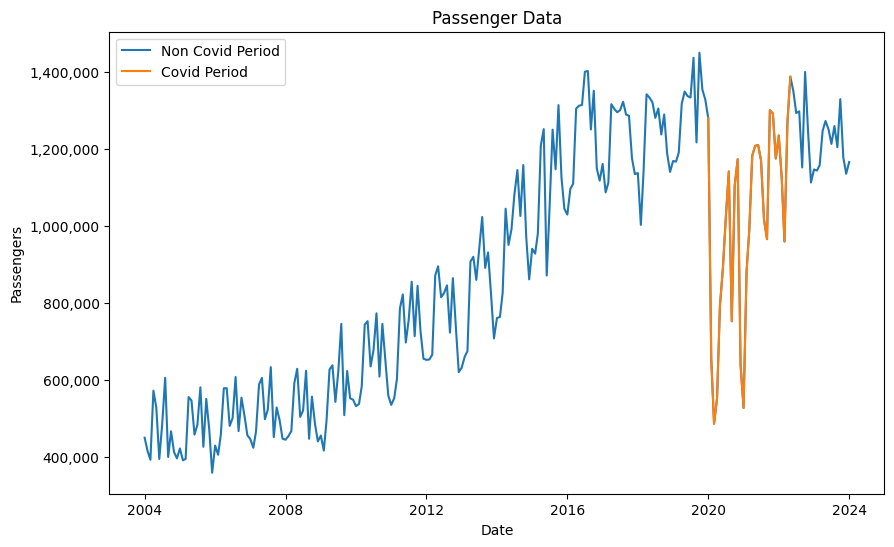

In [ ]:
# Plot passanger data
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure(figsize=(10, 6))
plt.plot(data.index, data['passengers'], label='Non Covid Period')
plt.plot(covid_data.index, covid_data['passengers'], label='Covid Period')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))  # Adds commas for thousands
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.title('Passenger Data')
plt.legend()
plt.show()

###**Economic Variables**

**GDP**

We can see a very stable growth over time. No particular outliers can be found. The variable is **not stationary**.

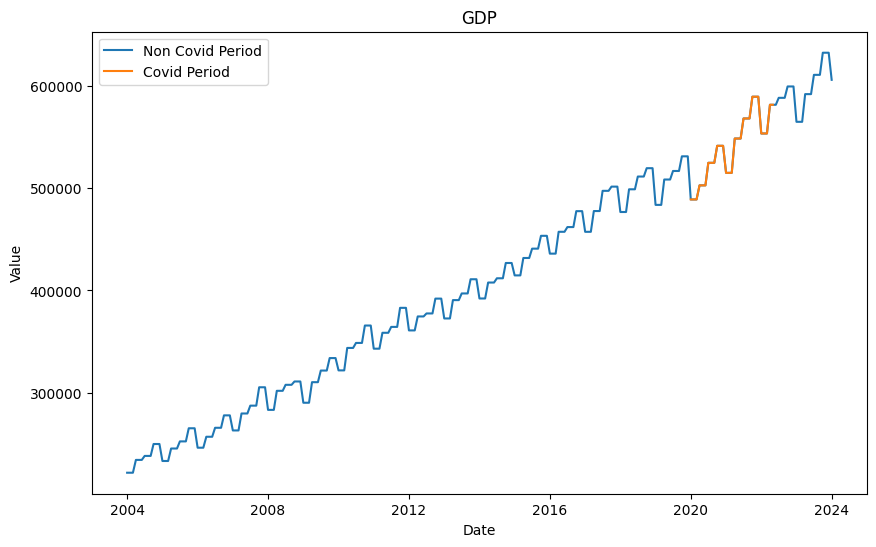

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['gdp'], label='Non Covid Period')
plt.plot(covid_data.index, covid_data['gdp'], label='Covid Period')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('GDP')
plt.legend()
plt.show()

**GDP growth**

We can see that GPD growth has a big outlier right after the Covid period.

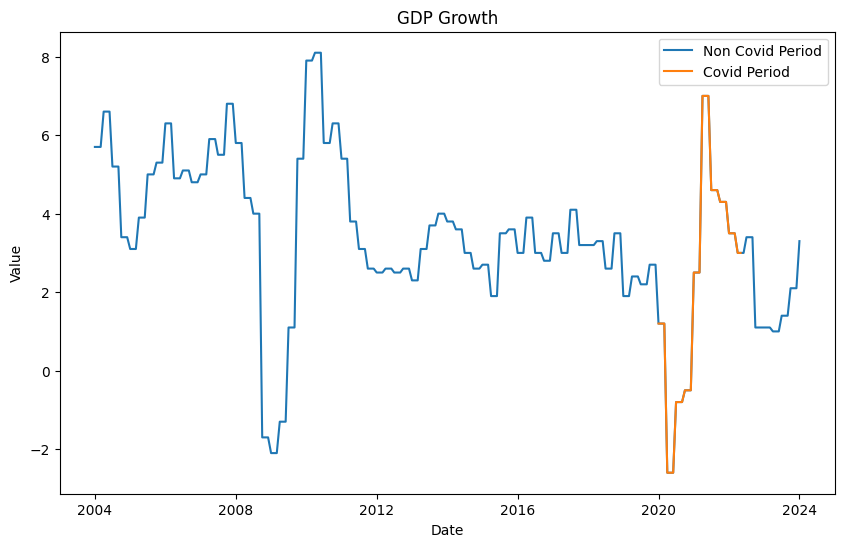

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['gdp_growth'], label='Non Covid Period')
plt.plot(covid_data.index, covid_data['gdp_growth'], label='Covid Period')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('GDP Growth')
plt.legend()
plt.show()

**ESI**

The ESI sees two big outliers. One for the Covid-19 period and another one for the Financial crisis of 2007.

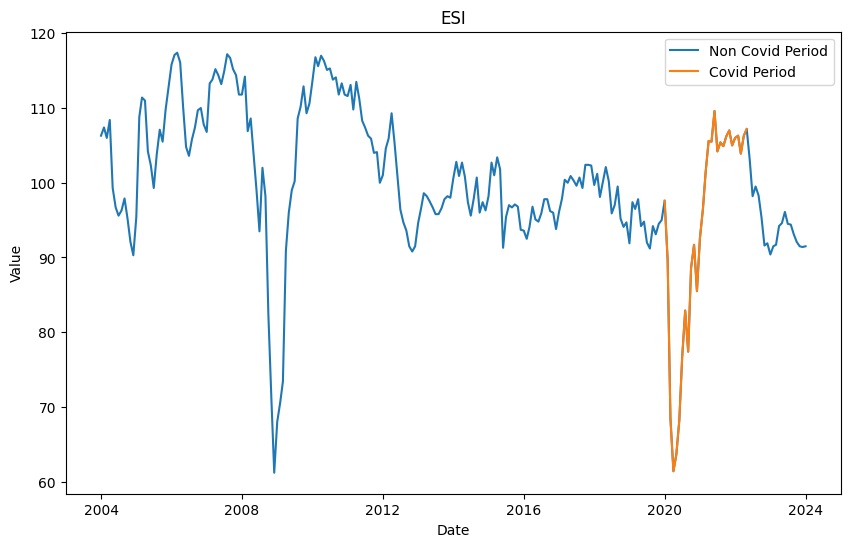

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['esi'], label='Non Covid Period')
plt.plot(covid_data.index, covid_data['esi'], label='Covid Period')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('ESI')
plt.legend()

### **Weather Data - Temperature and Humidity**

As expected, the weather data is very stable over time and does not contain any outliers. Furthermore, the seasonality is visible.

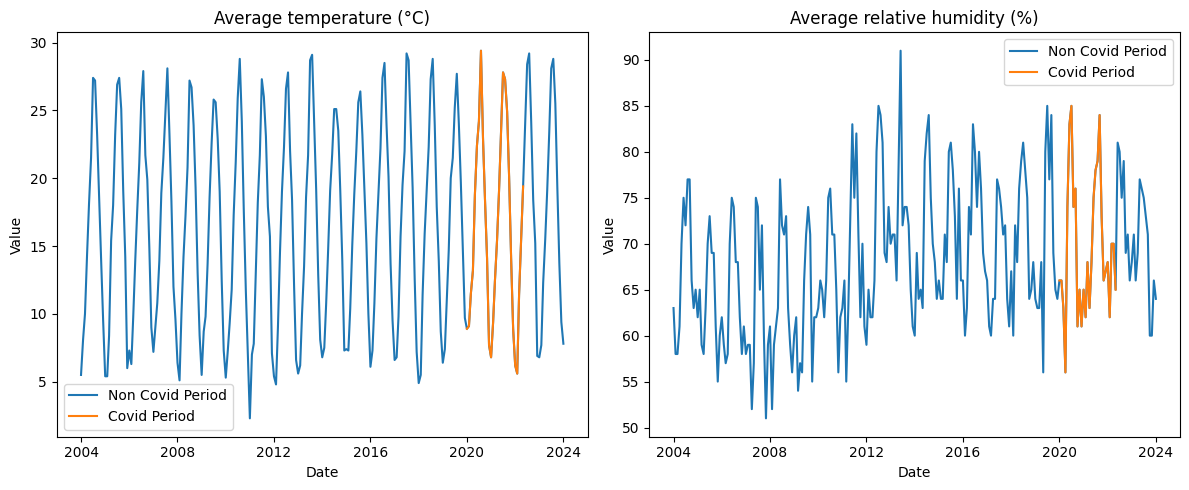

In [ ]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# First plot: Average temperature
axes[0].plot(data.index, data['Average temperature (°C)'], label='Non Covid Period')
axes[0].plot(covid_data.index, covid_data['Average temperature (°C)'], label='Covid Period')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Value')
axes[0].set_title('Average temperature (°C)')
axes[0].legend()

# Second plot: Average relative humidity
axes[1].plot(data.index, data['Average relative humidity (%)'], label='Non Covid Period')
axes[1].plot(covid_data.index, covid_data['Average relative humidity (%)'], label='Covid Period')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Value')
axes[1].set_title('Average relative humidity (%)')
axes[1].legend()

plt.tight_layout()
plt.show()

## 0.2.3 Stationarity

### 0.2.3.0 Checking for Stationarity

In [ ]:
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    # Use the adfuller method provided by the statsmodels package
    dftest = adfuller(timeseries, autolag='AIC')

    # Organize and print the results returned by the adfuller method
    print('Results of Dickey-Fuller Test : ')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
    	dfoutput[f'Critical Value {key}'] = value

    print(dfoutput)
    print('\n')
    if dftest[1] <= 0.05:
        print("The series is stationary")
    else:
        print("The series is not stationary")


#### Target Variable - Passenger Data

The ACF suggest non-stationaity. The sharp cutoff in PACF suggests that a simple AR(1) component might suffice for the non-seasonal AR part of your model.

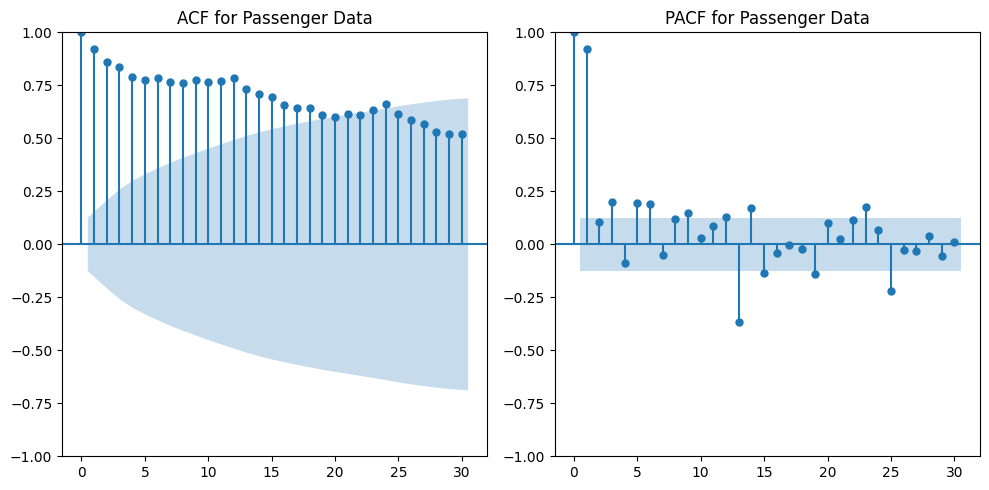

Results of Dickey-Fuller Test : 
Test Statistic                  -1.213357
p-value                          0.667823
#Lags Used                      14.000000
Number of Observations Used    226.000000
Critical Value 1%               -3.459620
Critical Value 5%               -2.874415
Critical Value 10%              -2.573632
dtype: float64


The series is not stationary


In [ ]:
import statsmodels.api as sm

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

sm.graphics.tsa.plot_acf(data['passengers'], lags=30, ax=axes[0])
axes[0].set_title('ACF for Passenger Data')

sm.graphics.tsa.plot_pacf(data['passengers'], lags=30, ax=axes[1])
axes[1].set_title('PACF for Passenger Data')

plt.tight_layout()
plt.show()

augmented_dickey_fuller_test(data['passengers'])

#### Economic Variables

**GDP**

The ACF suggest non-stationaity. The sharp cutoff in PACF suggests that a simple AR(1) component might suffice for the non-seasonal AR part of your model.

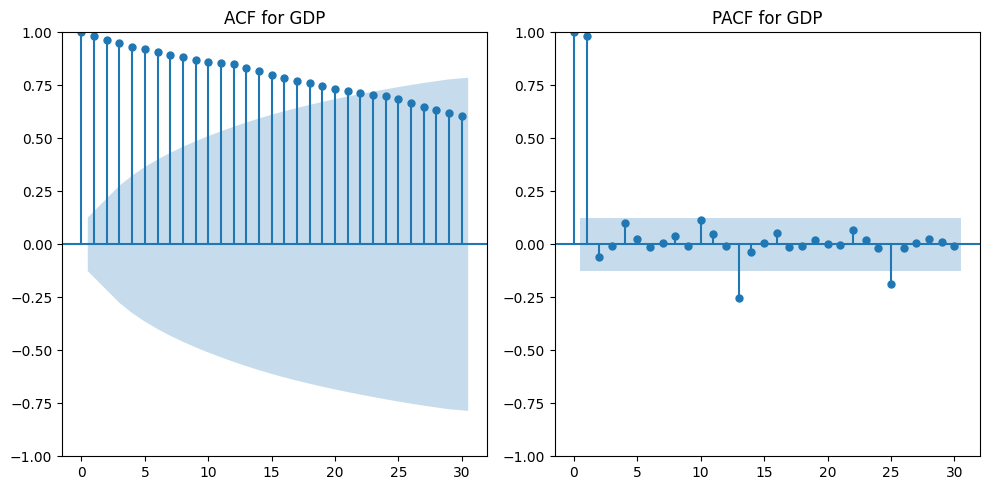

Results of Dickey-Fuller Test : 
Test Statistic                   0.805713
p-value                          0.991728
#Lags Used                      15.000000
Number of Observations Used    225.000000
Critical Value 1%               -3.459752
Critical Value 5%               -2.874473
Critical Value 10%              -2.573663
dtype: float64


The series is not stationary


In [ ]:
from logging import log
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

sm.graphics.tsa.plot_acf(data['gdp'], lags=30, ax=axes[0])
axes[0].set_title('ACF for GDP')

sm.graphics.tsa.plot_pacf(data['gdp'], lags=30, ax=axes[1])
axes[1].set_title('PACF for GDP')

plt.tight_layout()
plt.show()

augmented_dickey_fuller_test(data['gdp'])


**GDP growth**

The ACF suggest non-stationaity. The sharp cutoff in PACF suggests that a simple AR(1) component might suffice for the non-seasonal AR part of your model.

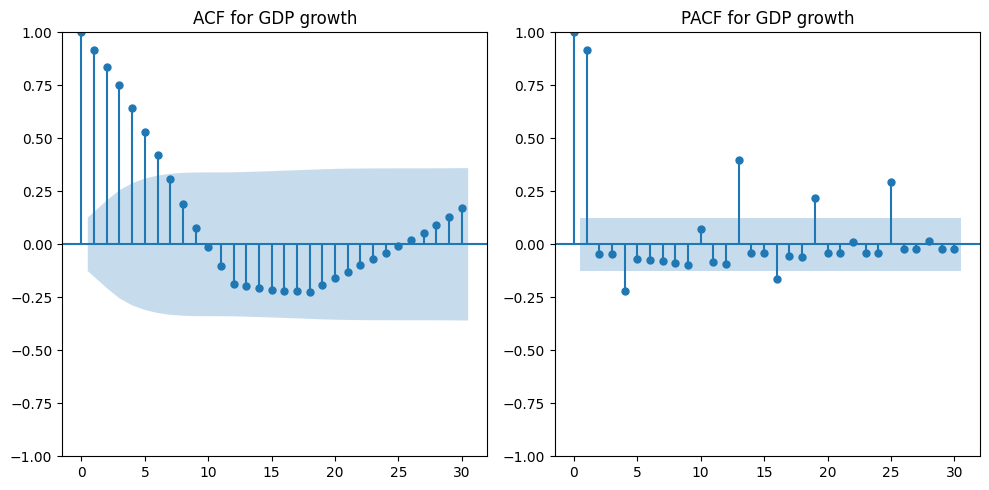

Results of Dickey-Fuller Test : 
Test Statistic                  -3.550408
p-value                          0.006783
#Lags Used                      15.000000
Number of Observations Used    225.000000
Critical Value 1%               -3.459752
Critical Value 5%               -2.874473
Critical Value 10%              -2.573663
dtype: float64


The series is stationary


In [ ]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

sm.graphics.tsa.plot_acf(data['gdp_growth'], lags=30, ax=axes[0])
axes[0].set_title('ACF for GDP growth')

sm.graphics.tsa.plot_pacf(data['gdp_growth'], lags=30, ax=axes[1])
axes[1].set_title('PACF for GDP growth')

plt.tight_layout()
plt.show()

augmented_dickey_fuller_test(data['gdp_growth'])


**ESI**

The ACF suggest non-stationaity. The sharp cutoff in PACF suggests that a simple AR(1) component might suffice for the non-seasonal AR part of your model.

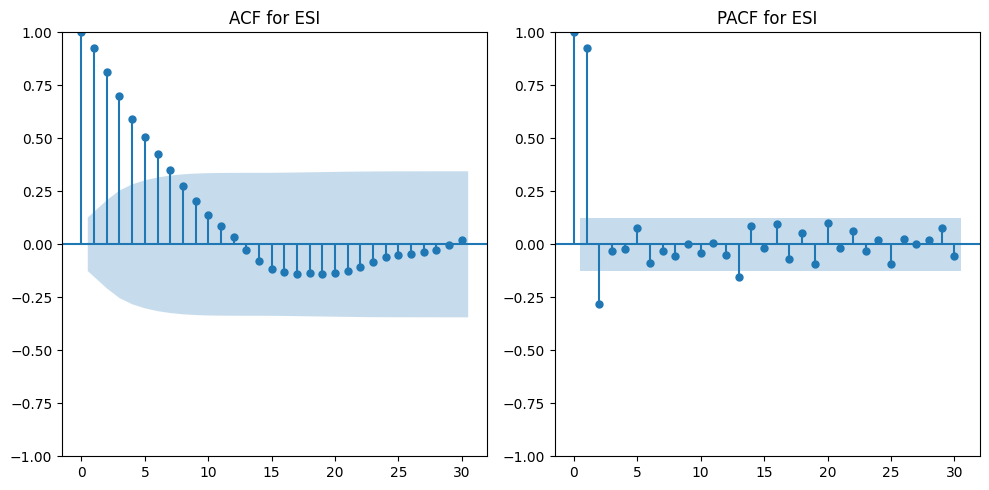

Results of Dickey-Fuller Test : 
Test Statistic                  -3.937128
p-value                          0.001778
#Lags Used                       1.000000
Number of Observations Used    239.000000
Critical Value 1%               -3.458011
Critical Value 5%               -2.873710
Critical Value 10%              -2.573256
dtype: float64


The series is stationary


In [ ]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

sm.graphics.tsa.plot_acf(data['esi'], lags=30, ax=axes[0])
axes[0].set_title('ACF for ESI')

sm.graphics.tsa.plot_pacf(data['esi'], lags=30, ax=axes[1])
axes[1].set_title('PACF for ESI')

plt.tight_layout()
plt.show()

augmented_dickey_fuller_test(data['esi'])

#### **Weather Data - Temperature and Humidity**



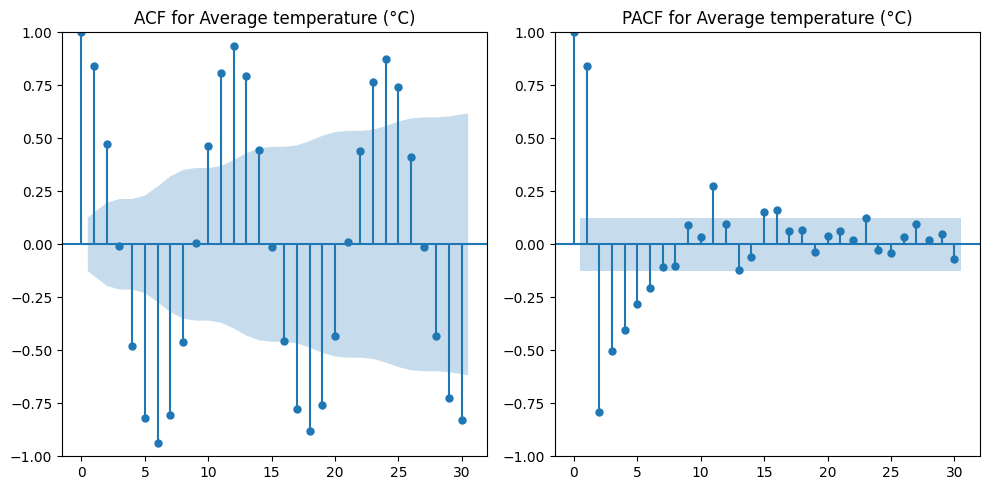

Results of Dickey-Fuller Test : 
Test Statistic                  -1.569093
p-value                          0.499098
#Lags Used                      11.000000
Number of Observations Used    229.000000
Critical Value 1%               -3.459233
Critical Value 5%               -2.874245
Critical Value 10%              -2.573541
dtype: float64


The series is not stationary


In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

sm.graphics.tsa.plot_acf(data['Average temperature (°C)'], lags=30, ax=axes[0])
axes[0].set_title('ACF for Average temperature (°C)')

sm.graphics.tsa.plot_pacf(data['Average temperature (°C)'], lags=30, ax=axes[1])
axes[1].set_title('PACF for Average temperature (°C)')

plt.tight_layout()
plt.show()

augmented_dickey_fuller_test(data['Average temperature (°C)'])


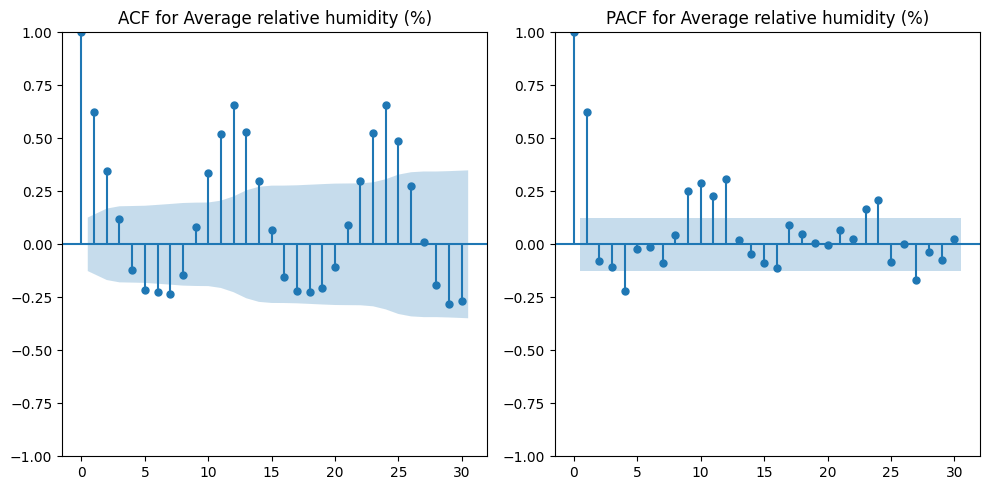

Results of Dickey-Fuller Test : 
Test Statistic                  -2.019651
p-value                          0.278024
#Lags Used                      15.000000
Number of Observations Used    225.000000
Critical Value 1%               -3.459752
Critical Value 5%               -2.874473
Critical Value 10%              -2.573663
dtype: float64


The series is not stationary


In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

sm.graphics.tsa.plot_acf(data['Average relative humidity (%)'], lags=30, ax=axes[0])
axes[0].set_title('ACF for Average relative humidity (%)')

sm.graphics.tsa.plot_pacf(data['Average relative humidity (%)'], lags=30, ax=axes[1])
axes[1].set_title('PACF for Average relative humidity (%)')

plt.tight_layout()
plt.show()

augmented_dickey_fuller_test(data['Average relative humidity (%)'])


#### **Weather Data - Others**

In [ ]:
print('Augmented Dickey-Fuller Test for Weather Data')
print('\n')
print('Maximum vapor pressure (hPa)')
augmented_dickey_fuller_test(data['Maximum vapor pressure (hPa)'])
print('\n')
print('Small total evapotation (mm)')
augmented_dickey_fuller_test(data['Small total evaporation (mm)'])
print('\n')
print('Average wind speed (m/s)')
augmented_dickey_fuller_test(data['Average wind speed (m/s)'])

Augmented Dickey-Fuller Test for Weather Data


Maximum vapor pressure (hPa)
Results of Dickey-Fuller Test : 
Test Statistic                  -1.536851
p-value                          0.515210
#Lags Used                      12.000000
Number of Observations Used    228.000000
Critical Value 1%               -3.459361
Critical Value 5%               -2.874302
Critical Value 10%              -2.573571
dtype: float64


The series is not stationary


Small total evapotation (mm)
Results of Dickey-Fuller Test : 
Test Statistic                  -1.398131
p-value                          0.583172
#Lags Used                      13.000000
Number of Observations Used    227.000000
Critical Value 1%               -3.459490
Critical Value 5%               -2.874358
Critical Value 10%              -2.573602
dtype: float64


The series is not stationary


Average wind speed (m/s)
Results of Dickey-Fuller Test : 
Test Statistic                  -2.788300
p-value                          0.059965
#L

### 0.2.3.1 Obtain Stationaity by applying AR(1)

We obtain stationairty by applying first order differencing to the variables we have found to be non-stationary.

In [ ]:
def apply_first_order_differencing(data, var):
    data[var + '_raw'] = data[var]
    shift = data[var].shift()
    data[var + '_diff'] = data[var] - shift
    data[var] = data[var + '_diff']

    to_be_tested = data[var + '_diff'].dropna()

    print('Stationarity Test:')
    augmented_dickey_fuller_test(to_be_tested)


In [ ]:
print('After Applying First Order Differencing', '\n')

print('Target Variable - Passanger Data', '\n')
apply_first_order_differencing(data, 'passengers')
print('\n')
print('Economic Variables - GDP', '\n')
apply_first_order_differencing(data, 'gdp')
print('\n')
print('Weather Data - Temperature and Humidity', '\n')
apply_first_order_differencing(data, 'Average temperature (°C)')
print('\n')
apply_first_order_differencing(data, 'Average relative humidity (%)')
print('\n')
print('Weather Data - Others', '\n')
apply_first_order_differencing(data, 'Maximum vapor pressure (hPa)')
print('\n')
apply_first_order_differencing(data, 'Small total evaporation (mm)')
print('\n')
apply_first_order_differencing(data, 'Average wind speed (m/s)')


After Applying First Order Differencing 

Target Variable - Passanger Data 

Stationarity Test:
Results of Dickey-Fuller Test : 
Test Statistic                  -4.899149
p-value                          0.000035
#Lags Used                      13.000000
Number of Observations Used    226.000000
Critical Value 1%               -3.459620
Critical Value 5%               -2.874415
Critical Value 10%              -2.573632
dtype: float64


The series is stationary


Economic Variables - GDP 

Stationarity Test:
Results of Dickey-Fuller Test : 
Test Statistic                  -3.252655
p-value                          0.017132
#Lags Used                      14.000000
Number of Observations Used    225.000000
Critical Value 1%               -3.459752
Critical Value 5%               -2.874473
Critical Value 10%              -2.573663
dtype: float64


The series is stationary


Weather Data - Temperature and Humidity 

Stationarity Test:
Results of Dickey-Fuller Test : 
Test Statistic        

We have to drop the first observation after differencing.

In [ ]:
data = data.iloc[1:]
data.head()

passengers    esi      gdp  gdp_growth  Average temperature (°C)  \
date                                                                           
2004-02-01    -34952.0  107.4      0.0         5.7                       2.6   
2004-03-01    -22391.0  106.0      0.0         5.7                       1.9   
2004-04-01    179597.0  108.4  12549.7         6.6                       4.3   
2004-05-01    -43678.0   99.3      0.0         6.6                       3.8   
2004-06-01   -133809.0   96.7      0.0         6.6                       3.4   

            Average High Temperature (°C)  Average minimum temperature (°C)  \
date                                                                          
2004-02-01                           12.4                               4.5   
2004-03-01                           14.2                               6.2   
2004-04-01                           18.5                              10.4   
2004-05-01                           22.1                              14.7   
2004-06-01                           24.7                              18.8   

            Highest temperature (°C)  Lowest temperature (°C)  \
date                                                            
2004-02-01                      24.5                      0.8   
2004-03-01                      23.9                      0.4   
2004-04-01                      25.6                      5.0   
2004-05-01                      30.8                      9.7   
2004-06-01                      28.5                     14.6   

            Average local pressure (hPa)  ...  Average temperature (°C)_raw  \
date                                      ...                                 
2004-02-01                        1018.7  ...                           8.1   
2004-03-01                        1017.8  ...                          10.0   
2004-04-01                        1012.0  ...                          14.3   
2004-05-01                        1008.0  ...                          18.1   
2004-06-01                        1007.2  ...                          21.5   

            Average temperature (°C)_diff  Average relative humidity (%)_raw  \
date                                                                           
2004-02-01                            2.6                               58.0   
2004-03-01                            1.9                               58.0   
2004-04-01                            4.3                               61.0   
2004-05-01                            3.8                               70.0   
2004-06-01                            3.4                               75.0   

            Average relative humidity (%)_diff  \
date                                             
2004-02-01                                -5.0   
2004-03-01                                 0.0   
2004-04-01                                 3.0   
2004-05-01                                 9.0   
2004-06-01                                 5.0   

            Maximum vapor pressure (hPa)_raw  \
date                                           
2004-02-01                              16.9   
2004-03-01                              15.6   
2004-04-01                              19.8   
2004-05-01                              24.4   
2004-06-01                              28.2   

            Maximum vapor pressure (hPa)_diff  \
date                                            
2004-02-01                                7.3   
2004-03-01                               -1.3   
2004-04-01                                4.2   
2004-05-01                                4.6   
2004-06-01                                3.8   

            Small total evaporation (mm)_raw  \
date                                           
2004-02-01                              75.5   
2004-03-01                              96.4   
2004-04-01                             106.5   
2004-05-01                             113.5   
2004-0

### 0.2.3.2 Vizualisation after gaining Stationarity

**Target Variable - Passanger Data**

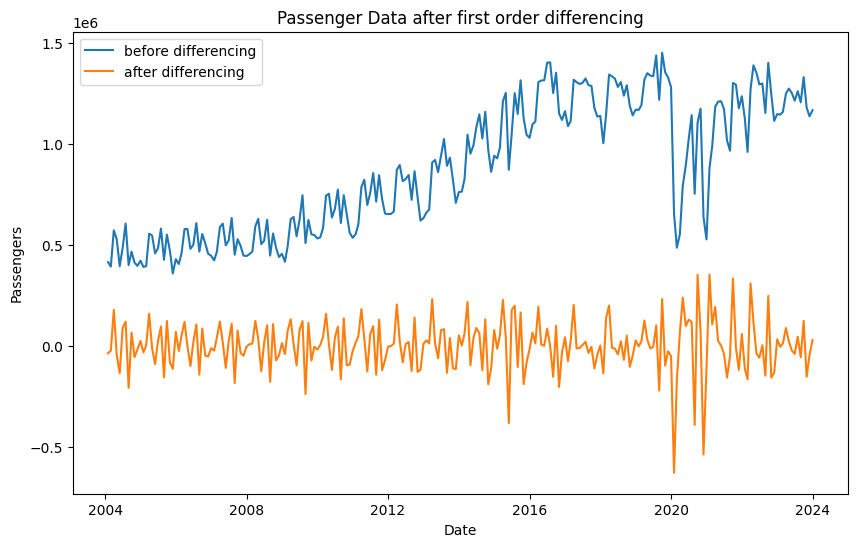

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['passengers_raw'], label='before differencing')
plt.plot(data.index, data['passengers'], label='after differencing')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.title('Passenger Data after first order differencing')
plt.legend()
plt.show()

**Economic Variables - GDP**

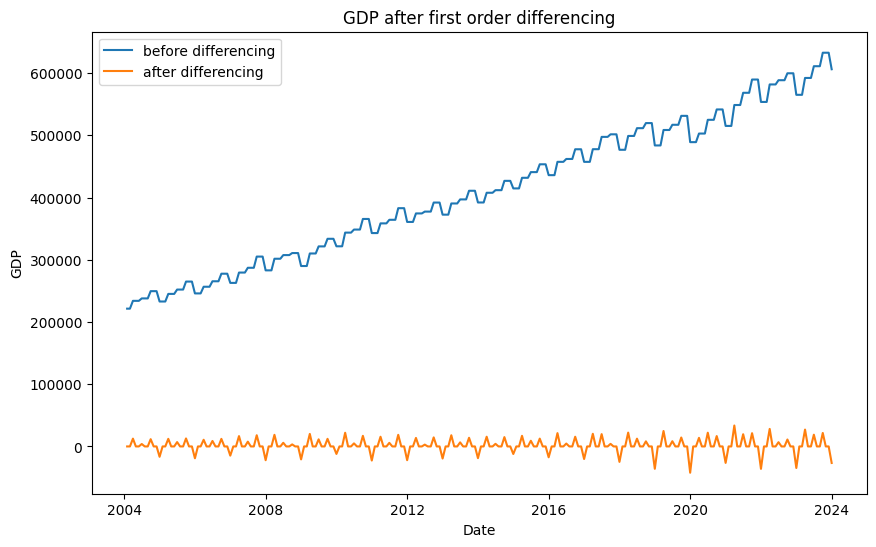

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['gdp_raw'], label='before differencing')
plt.plot(data.index, data['gdp'], label='after differencing')
plt.xlabel('Date')
plt.ylabel('GDP')
plt.title('GDP after first order differencing')
plt.legend()
plt.show()

**Weather Data - Temperature and Humidity**

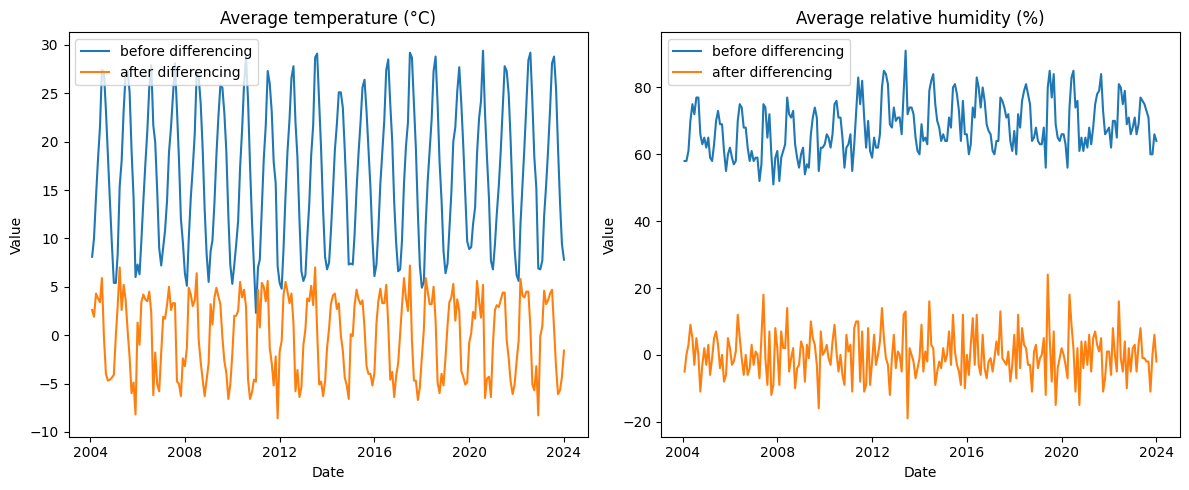

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# First plot: Average temperature
axes[0].plot(data.index, data['Average temperature (°C)_raw'], label='before differencing')
axes[0].plot(data.index, data['Average temperature (°C)'], label='after differencing')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Value')
axes[0].set_title('Average temperature (°C)')
axes[0].legend()

# Second plot: Average relative humidity
axes[1].plot(data.index, data['Average relative humidity (%)_raw'], label='before differencing')
axes[1].plot(data.index, data['Average relative humidity (%)'], label='after differencing')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Value')
axes[1].set_title('Average relative humidity (%)')
axes[1].legend()

plt.tight_layout()
plt.show()

## 0.2.4 Covid Partitioning for Preprocessing

In [ ]:
# Data without Covid period (without Jan 2020 to June 2022)
no_covid_data = data[data['covid19_period'] == 0]

# Data with only Covid period (only between Jan 2020 to June 2022)
covid_data = data[data['covid19_period'] == 1]

# Data with only pre Covid period (only before Jan 2020)
pre_covid_data = data[data.index < covid_period[0]]

# Data with only post Covid period (only after June 2022)
post_covid_data = data[data.index > covid_period[1]]

# Create independent copies of each dataset
data = data.copy(deep=True)
data.name = 'Total period'
no_covid_data = no_covid_data.copy(deep=True)
no_covid_data.name = 'Pre and post Covid period'
covid_data = covid_data.copy(deep=True)
covid_data.name = 'Covid period'
pre_covid_data = pre_covid_data.copy(deep=True)
pre_covid_data.name = 'Pre Covid period'
post_covid_data = post_covid_data.copy(deep=True)
post_covid_data.name = 'Post Covid period'


## 0.2.5 Outlier Handling

Some functions to handle outliers.

In [ ]:
import scipy.stats as stats
from scipy.stats.mstats import winsorize

# Define function which apply Chauvenet criterion to detect outlier
def chauvenet_criterion(data):
    mean = np.mean(data)
    std_dev = np.std(data)
    N = len(data)

    # Calculate the Z-scores of each data point
    z_scores = np.abs(data - mean) / std_dev

    # Calculate the probability of each Z-score
    probabilities = 1 - stats.norm.cdf(z_scores)

    # Calculate the Chauvenet's criterion threshold
    criterion_threshold = 1.0 / (2 * N)

    # Identify outliers based on the criterion
    outliers = data[probabilities < criterion_threshold]
    return outliers

def visualize_outliers(data, var):
    plt.figure(figsize=(5, 3))
    outliers = chauvenet_criterion(data[var])
    outlier_indices = data[var].isin(outliers)
    plt.plot(data.index, data[var], marker='o', linestyle='-', label=var, markersize=2)
    plt.scatter(data.index[outlier_indices], data[var][outlier_indices], color='red', marker='x', s=100, label='Outliers', zorder=5)
    plt.title(var + ' Over Time in ' + data.name)
    plt.ylabel(var)
    plt.xlabel('Datetime')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

def winsorize_outliers(data, var):
    outliers = chauvenet_criterion(data[var])
    outlier_indices = data[var].isin(outliers)
    data[var][outlier_indices] = winsorize(data[var], limits=[0.05, 0.05])
    visualize_after_winsorization(data, var, outlier_indices)

def visualize_after_winsorization(data, var, outlier_indices):
  plt.figure(figsize=(5, 3))
  plt.plot(data.index, data[var], marker='o', linestyle='-', label=var, markersize=2)
  plt.scatter(data.index[outlier_indices], data[var][outlier_indices], color='green', marker='o', s=100, label='Winsorized outliers', zorder=5)
  plt.title(var + ' Over Time in ' + data.name + ' after Winsorization')
  plt.ylabel(var)
  plt.xlabel('Datetime')
  plt.grid(True)
  plt.xticks(rotation=45)
  plt.legend()
  plt.show()


#### Target Variable - Passenger Data

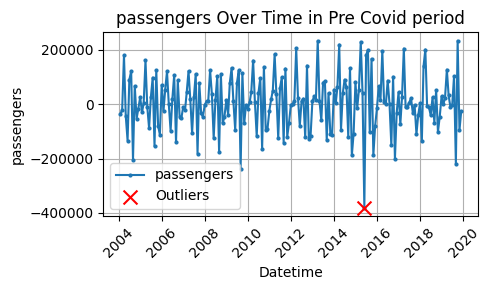

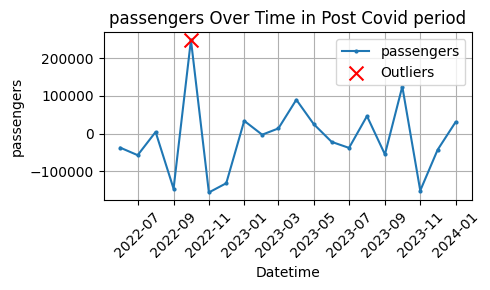

<ipython-input-166-11e9fd1efaca>:41: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data[var][outlier_indices] = winsorize(data[var], limits=[0.05, 0.05])
<ipython-input-166-11e9fd1efaca>:41: SettingWithCopyWarning: 
A value is trying to be s

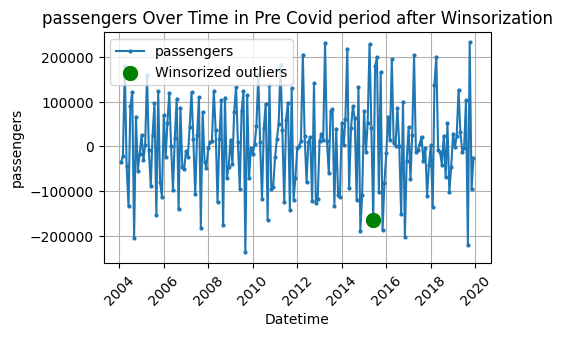

<ipython-input-166-11e9fd1efaca>:41: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data[var][outlier_indices] = winsorize(data[var], limits=[0.05, 0.05])
<ipython-input-166-11e9fd1efaca>:41: SettingWithCopyWarning: 
A value is trying to be s

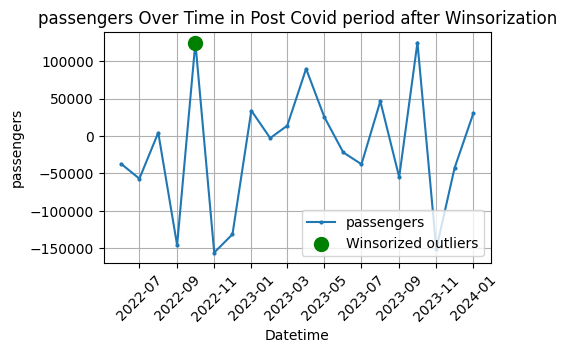

passengers    esi      gdp  gdp_growth  Average temperature (°C)  \
date                                                                           
2004-02-01    -34952.0  107.4      0.0         5.7                       2.6   
2004-03-01    -22391.0  106.0      0.0         5.7                       1.9   
2004-04-01    179597.0  108.4  12549.7         6.6                       4.3   
2004-05-01    -43678.0   99.3      0.0         6.6                       3.8   
2004-06-01   -133809.0   96.7      0.0         6.6                       3.4   

            Average High Temperature (°C)  Average minimum temperature (°C)  \
date                                                                          
2004-02-01                           12.4                               4.5   
2004-03-01                           14.2                               6.2   
2004-04-01                           18.5                              10.4   
2004-05-01                           22.1                              14.7   
2004-06-01                           24.7                              18.8   

            Highest temperature (°C)  Lowest temperature (°C)  \
date                                                            
2004-02-01                      24.5                      0.8   
2004-03-01                      23.9                      0.4   
2004-04-01                      25.6                      5.0   
2004-05-01                      30.8                      9.7   
2004-06-01                      28.5                     14.6   

            Average local pressure (hPa)  ...  Average temperature (°C)_raw  \
date                                      ...                                 
2004-02-01                        1018.7  ...                           8.1   
2004-03-01                        1017.8  ...                          10.0   
2004-04-01                        1012.0  ...                          14.3   
2004-05-01                        1008.0  ...                          18.1   
2004-06-01                        1007.2  ...                          21.5   

            Average temperature (°C)_diff  Average relative humidity (%)_raw  \
date                                                                           
2004-02-01                            2.6                               58.0   
2004-03-01                            1.9                               58.0   
2004-04-01                            4.3                               61.0   
2004-05-01                            3.8                               70.0   
2004-06-01                            3.4                               75.0   

            Average relative humidity (%)_diff  \
date                                             
2004-02-01                                -5.0   
2004-03-01                                 0.0   
2004-04-01                                 3.0   
2004-05-01                                 9.0   
2004-06-01                                 5.0   

            Maximum vapor pressure (hPa)_raw  \
date                                           
2004-02-01                              16.9   
2004-03-01                              15.6   
2004-04-01                              19.8   
2004-05-01                              24.4   
2004-06-01                              28.2   

            Maximum vapor pressure (hPa)_diff  \
date                                            
2004-02-01                                7.3   
2004-03-01                               -1.3   
2004-04-01                                4.2   
2004-05-01                                4.6   
2004-06-01                                3.8   

            Small total evaporation (mm)_raw  \
date                                           
2004-02-01                              75.5   
2004-03-01                              96.4   
2004-04-01                             106.5   
2004-05-01                             113.5   
2004-0

In [ ]:
visualize_outliers(pre_covid_data, 'passengers')
visualize_outliers(post_covid_data, 'passengers')
winsorize_outliers(pre_covid_data, 'passengers')
winsorize_outliers(post_covid_data, 'passengers')

pre_covid_data.head()


#### Economic Variables

**GDP**

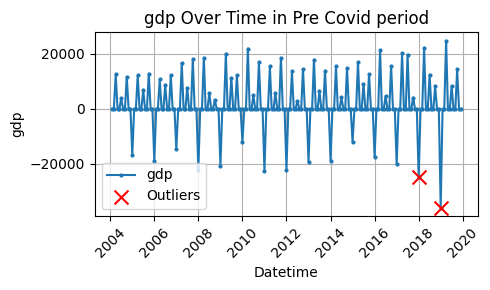

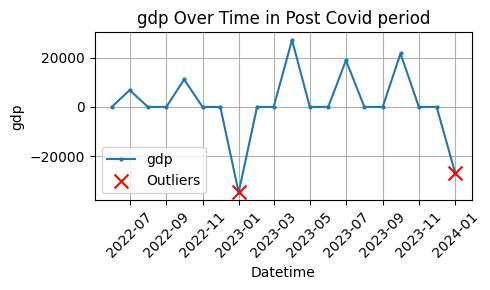

<ipython-input-166-11e9fd1efaca>:41: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data[var][outlier_indices] = winsorize(data[var], limits=[0.05, 0.05])
<ipython-input-166-11e9fd1efaca>:41: SettingWithCopyWarning: 
A value is trying to be s

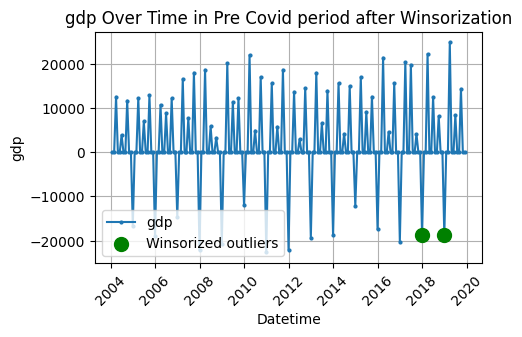

<ipython-input-166-11e9fd1efaca>:41: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data[var][outlier_indices] = winsorize(data[var], limits=[0.05, 0.05])
<ipython-input-166-11e9fd1efaca>:41: SettingWithCopyWarning: 
A value is trying to be s

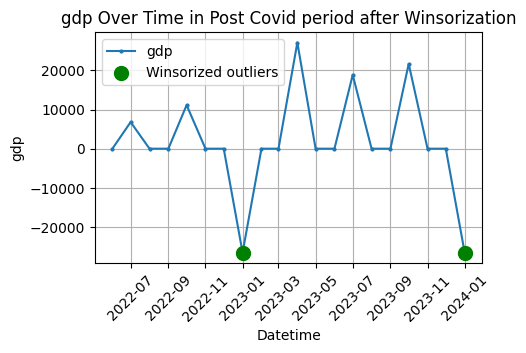

In [ ]:
visualize_outliers(pre_covid_data, 'gdp')
visualize_outliers(post_covid_data, 'gdp')
winsorize_outliers(pre_covid_data, 'gdp')
winsorize_outliers(post_covid_data, 'gdp')

**GDP Growth**

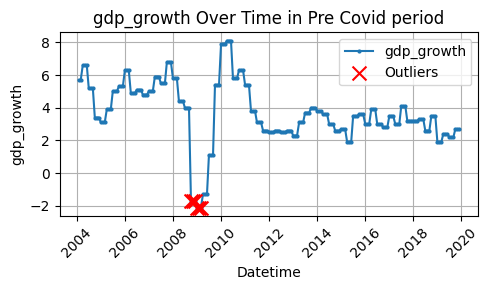

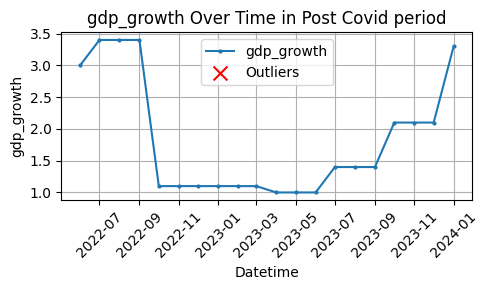

<ipython-input-166-11e9fd1efaca>:41: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data[var][outlier_indices] = winsorize(data[var], limits=[0.05, 0.05])
<ipython-input-166-11e9fd1efaca>:41: SettingWithCopyWarning: 
A value is trying to be s

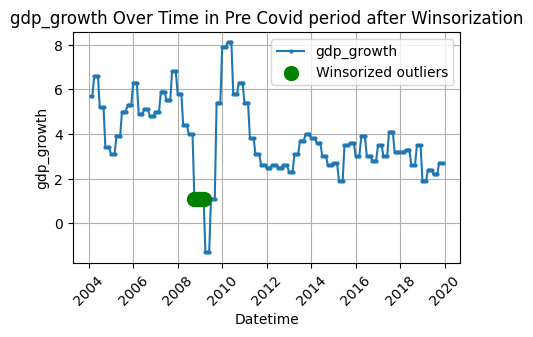

<ipython-input-166-11e9fd1efaca>:41: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data[var][outlier_indices] = winsorize(data[var], limits=[0.05, 0.05])
<ipython-input-166-11e9fd1efaca>:41: SettingWithCopyWarning: 
A value is trying to be s

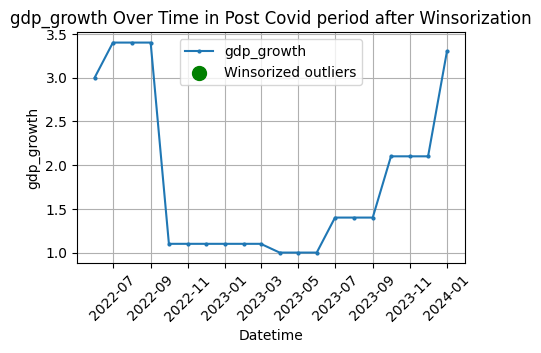

In [ ]:
visualize_outliers(pre_covid_data, 'gdp_growth')
visualize_outliers(post_covid_data, 'gdp_growth')
winsorize_outliers(pre_covid_data, 'gdp_growth')
winsorize_outliers(post_covid_data, 'gdp_growth')

**ESI**

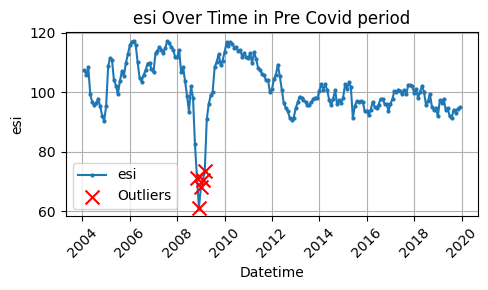

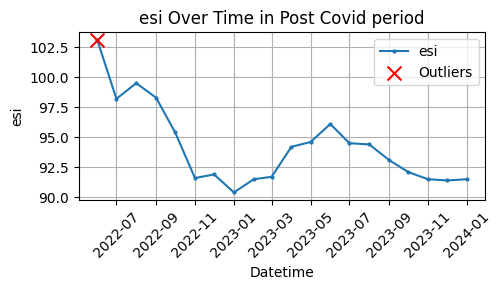

<ipython-input-166-11e9fd1efaca>:41: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data[var][outlier_indices] = winsorize(data[var], limits=[0.05, 0.05])
<ipython-input-166-11e9fd1efaca>:41: SettingWithCopyWarning: 
A value is trying to be s

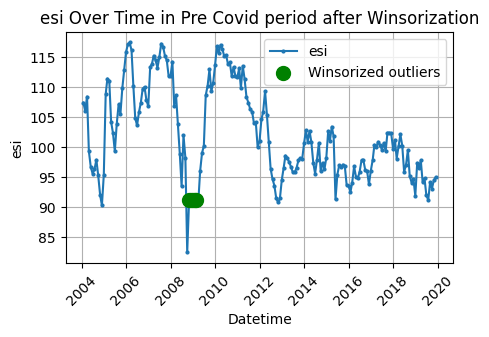

<ipython-input-166-11e9fd1efaca>:41: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data[var][outlier_indices] = winsorize(data[var], limits=[0.05, 0.05])
<ipython-input-166-11e9fd1efaca>:41: SettingWithCopyWarning: 
A value is trying to be s

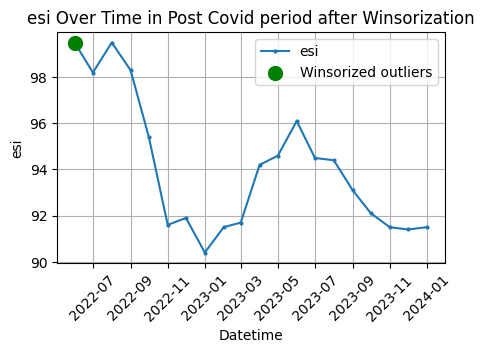

In [ ]:
visualize_outliers(pre_covid_data, 'esi')
visualize_outliers(post_covid_data, 'esi')
winsorize_outliers(pre_covid_data, 'esi')
winsorize_outliers(post_covid_data, 'esi')

#### **Weather Data**



**Temperature**

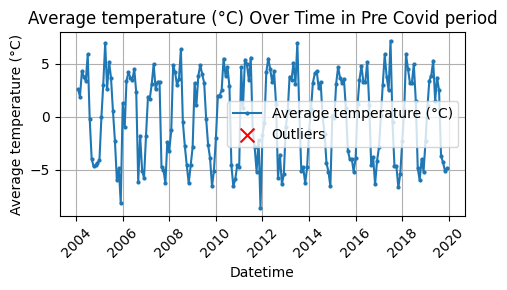

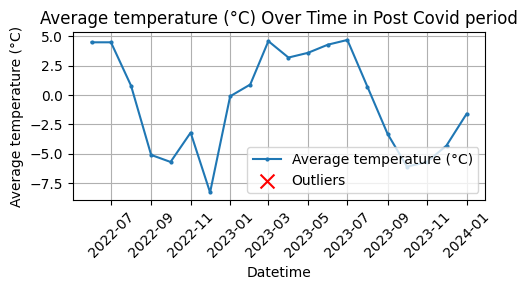

<ipython-input-166-11e9fd1efaca>:41: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data[var][outlier_indices] = winsorize(data[var], limits=[0.05, 0.05])
<ipython-input-166-11e9fd1efaca>:41: SettingWithCopyWarning: 
A value is trying to be s

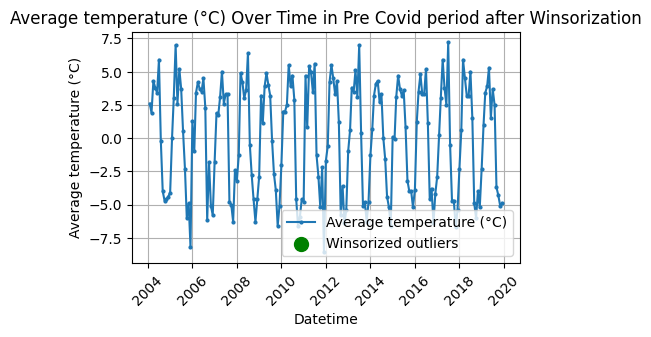

<ipython-input-166-11e9fd1efaca>:41: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data[var][outlier_indices] = winsorize(data[var], limits=[0.05, 0.05])
<ipython-input-166-11e9fd1efaca>:41: SettingWithCopyWarning: 
A value is trying to be s

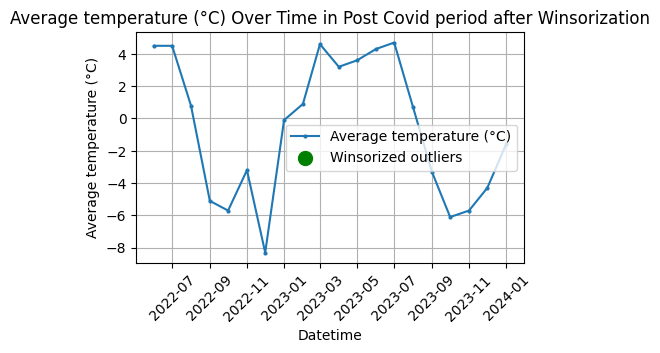

In [ ]:
visualize_outliers(pre_covid_data, 'Average temperature (°C)')
visualize_outliers(post_covid_data, 'Average temperature (°C)')
winsorize_outliers(pre_covid_data, 'Average temperature (°C)')
winsorize_outliers(post_covid_data, 'Average temperature (°C)')

**Humidity**

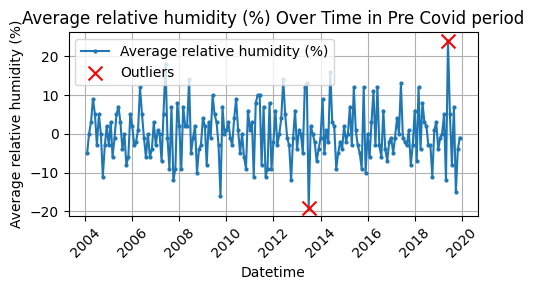

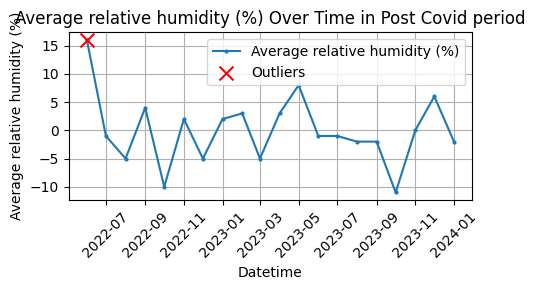

<ipython-input-166-11e9fd1efaca>:41: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data[var][outlier_indices] = winsorize(data[var], limits=[0.05, 0.05])
<ipython-input-166-11e9fd1efaca>:41: SettingWithCopyWarning: 
A value is trying to be s

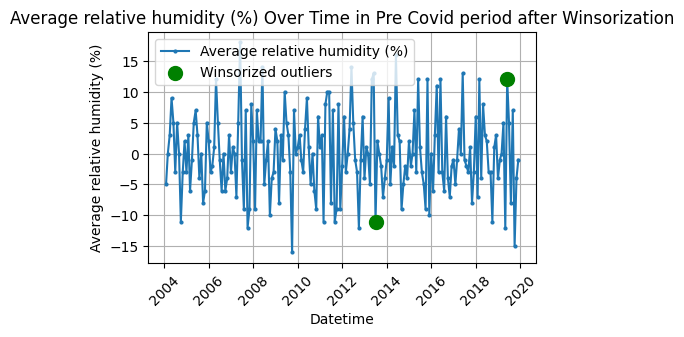

<ipython-input-166-11e9fd1efaca>:41: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data[var][outlier_indices] = winsorize(data[var], limits=[0.05, 0.05])
<ipython-input-166-11e9fd1efaca>:41: SettingWithCopyWarning: 
A value is trying to be s

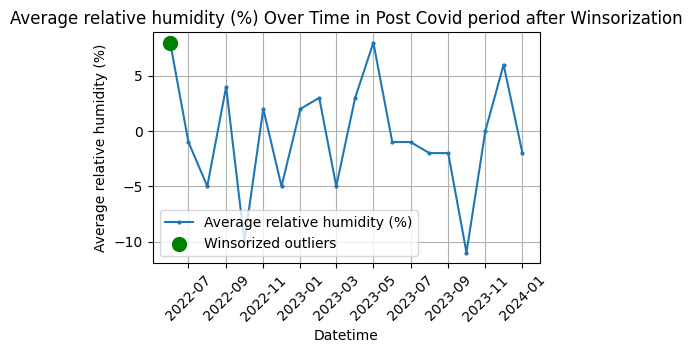

In [ ]:
visualize_outliers(pre_covid_data, 'Average relative humidity (%)')
visualize_outliers(post_covid_data, 'Average relative humidity (%)')
winsorize_outliers(pre_covid_data, 'Average relative humidity (%)')
winsorize_outliers(post_covid_data, 'Average relative humidity (%)')

**Maximum vapor pressure (hPa)**

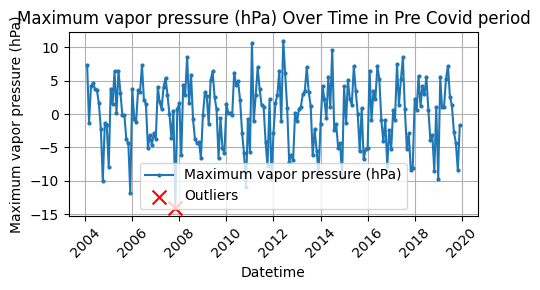

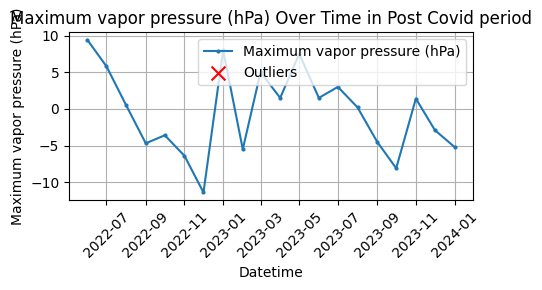

<ipython-input-166-11e9fd1efaca>:41: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data[var][outlier_indices] = winsorize(data[var], limits=[0.05, 0.05])
<ipython-input-166-11e9fd1efaca>:41: SettingWithCopyWarning: 
A value is trying to be s

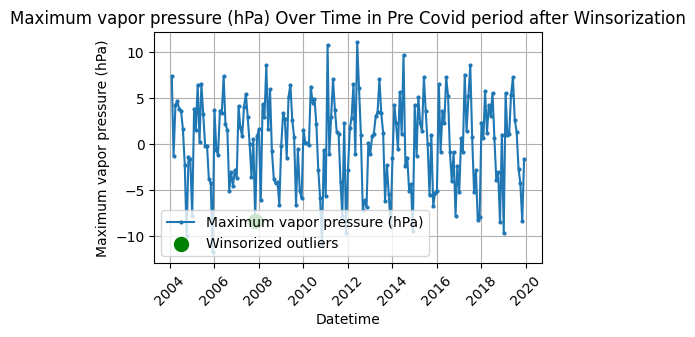

<ipython-input-166-11e9fd1efaca>:41: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data[var][outlier_indices] = winsorize(data[var], limits=[0.05, 0.05])
<ipython-input-166-11e9fd1efaca>:41: SettingWithCopyWarning: 
A value is trying to be s

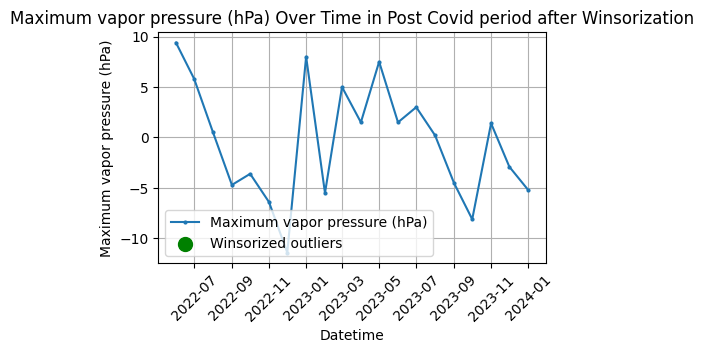

In [ ]:
visualize_outliers(pre_covid_data, 'Maximum vapor pressure (hPa)')
visualize_outliers(post_covid_data, 'Maximum vapor pressure (hPa)')
winsorize_outliers(pre_covid_data, 'Maximum vapor pressure (hPa)')
winsorize_outliers(post_covid_data, 'Maximum vapor pressure (hPa)')

**Small total evaporation**

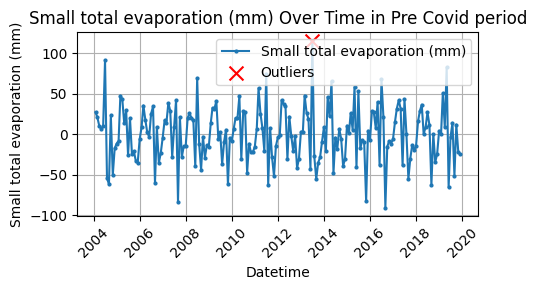

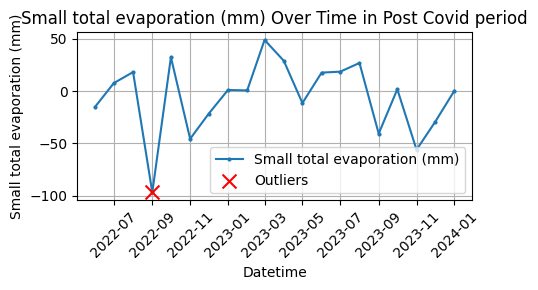

<ipython-input-166-11e9fd1efaca>:41: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data[var][outlier_indices] = winsorize(data[var], limits=[0.05, 0.05])
<ipython-input-166-11e9fd1efaca>:41: SettingWithCopyWarning: 
A value is trying to be s

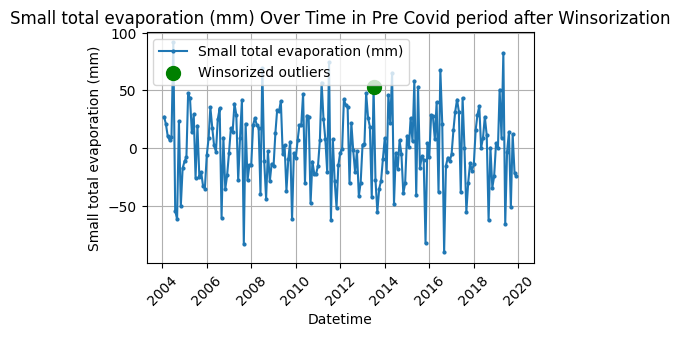

<ipython-input-166-11e9fd1efaca>:41: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data[var][outlier_indices] = winsorize(data[var], limits=[0.05, 0.05])
<ipython-input-166-11e9fd1efaca>:41: SettingWithCopyWarning: 
A value is trying to be s

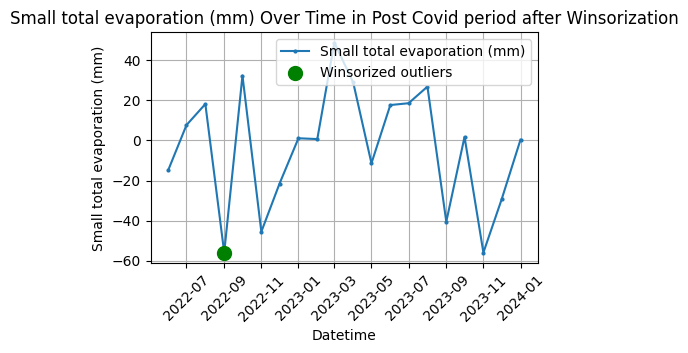

In [ ]:
visualize_outliers(pre_covid_data, 'Small total evaporation (mm)')
visualize_outliers(post_covid_data, 'Small total evaporation (mm)')
winsorize_outliers(pre_covid_data, 'Small total evaporation (mm)')
winsorize_outliers(post_covid_data, 'Small total evaporation (mm)')

**Average wind speed**

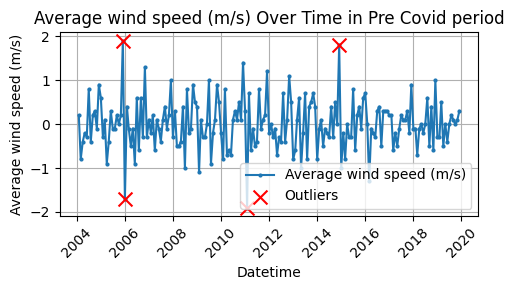

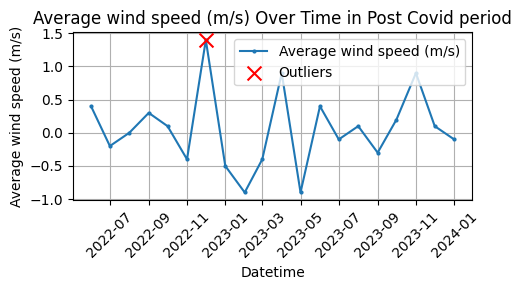

<ipython-input-166-11e9fd1efaca>:41: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data[var][outlier_indices] = winsorize(data[var], limits=[0.05, 0.05])
<ipython-input-166-11e9fd1efaca>:41: SettingWithCopyWarning: 
A value is trying to be s

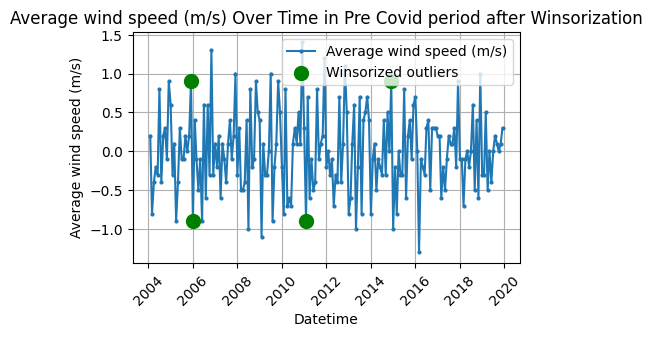

<ipython-input-166-11e9fd1efaca>:41: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data[var][outlier_indices] = winsorize(data[var], limits=[0.05, 0.05])
<ipython-input-166-11e9fd1efaca>:41: SettingWithCopyWarning: 
A value is trying to be s

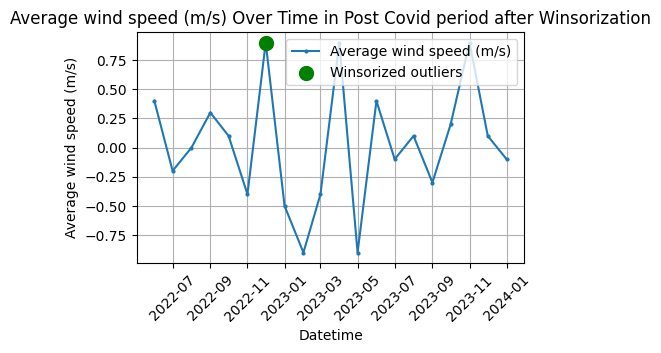

In [ ]:
visualize_outliers(pre_covid_data, 'Average wind speed (m/s)')
visualize_outliers(post_covid_data, 'Average wind speed (m/s)')
winsorize_outliers(pre_covid_data, 'Average wind speed (m/s)')
winsorize_outliers(post_covid_data, 'Average wind speed (m/s)')

## 0.2.6 Normalization

We normalize the data. For the normalization, we consider each dataset seperate from each other.

In [ ]:
# Normalize our variables of interest
from sklearn.preprocessing import MinMaxScaler

# List of datasets to normalize in place
datasets_to_normalize = [data, no_covid_data, covid_data, pre_covid_data, post_covid_data]

for dataset in datasets_to_normalize:
    scaler = MinMaxScaler()

    # Apply MinMaxScaler directly to each column without creating a copy
    dataset['esi'] = scaler.fit_transform(dataset[['esi']])
    dataset['gdp'] = scaler.fit_transform(dataset[['gdp']])
    dataset['gdp_growth'] = scaler.fit_transform(dataset[['gdp_growth']])
    dataset['Average temperature (°C)'] = scaler.fit_transform(dataset[['Average temperature (°C)']])
    dataset['Average relative humidity (%)'] = scaler.fit_transform(dataset[['Average relative humidity (%)']])
    dataset['Maximum vapor pressure (hPa)'] = scaler.fit_transform(dataset[['Maximum vapor pressure (hPa)']])
    dataset['Small total evaporation (mm)'] = scaler.fit_transform(dataset[['Small total evaporation (mm)']])
    dataset['Average wind speed (m/s)'] = scaler.fit_transform(dataset[['Average wind speed (m/s)']])


pre_covid_data.head()

passengers       esi       gdp  gdp_growth  \
date                                                     
2004-02-01    -34952.0  0.713467  0.477207    0.744681   
2004-03-01    -22391.0  0.673352  0.477207    0.744681   
2004-04-01    179597.0  0.742120  0.741291    0.840426   
2004-05-01    -43678.0  0.481375  0.477207    0.840426   
2004-06-01   -133809.0  0.406877  0.477207    0.840426   

            Average temperature (°C)  Average High Temperature (°C)  \
date                                                                  
2004-02-01                  0.708861                           12.4   
2004-03-01                  0.664557                           14.2   
2004-04-01                  0.816456                           18.5   
2004-05-01                  0.784810                           22.1   
2004-06-01                  0.759494                           24.7   

            Average minimum temperature (°C)  Highest temperature (°C)  \
date                                                                     
2004-02-01                               4.5                      24.5   
2004-03-01                               6.2                      23.9   
2004-04-01                              10.4                      25.6   
2004-05-01                              14.7                      30.8   
2004-06-01                              18.8                      28.5   

            Lowest temperature (°C)  Average local pressure (hPa)  ...  \
date                                                               ...   
2004-02-01                      0.8                        1018.7  ...   
2004-03-01                      0.4                        1017.8  ...   
2004-04-01                      5.0                        1012.0  ...   
2004-05-01                      9.7                        1008.0  ...   
2004-06-01                     14.6                        1007.2  ...   

            Average temperature (°C)_raw  Average temperature (°C)_diff  \
date                                                                      
2004-02-01                           8.1                            2.6   
2004-03-01                          10.0                            1.9   
2004-04-01                          14.3                            4.3   
2004-05-01                          18.1                            3.8   
2004-06-01                          21.5                            3.4   

            Average relative humidity (%)_raw  \
date                                            
2004-02-01                               58.0   
2004-03-01                               58.0   
2004-04-01                               61.0   
2004-05-01                               70.0   
2004-06-01                               75.0   

            Average relative humidity (%)_diff  \
date                                             
2004-02-01                                -5.0   
2004-03-01                                 0.0   
2004-04-01                                 3.0   
2004-05-01                                 9.0   
2004-06-01                                 5.0   

            Maximum vapor pressure (hPa)_raw  \
date                                           
2004-02-01                              16.9   
2004-03-01                              15.6   
2004-04-01                              19.8   
2004-05-01                              24.4   
2004-06-01                              28.2   

            Maximum vapor pressure (hPa)_diff  \
date                                            
2004-02-01                                7.3   
2004-03-01                               -1.3   
2004-04-01                                4.2   
2004-05-01                                4.6   
2004-06-01                                3.8   

            Small total evaporation (mm)_raw  \
date                                           
2004-02-01                              75.5   
2004-03-01             

**Vizualization after Normalization**

After Normalization, we see that the second outlier in GDP growth rate now falls into the Covid period, meaning, we now take that outlier in account.

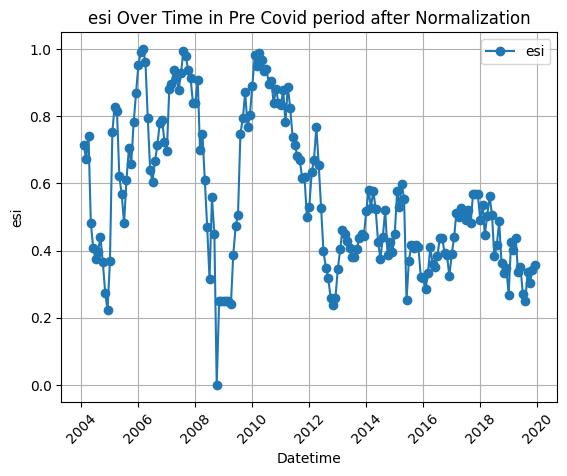

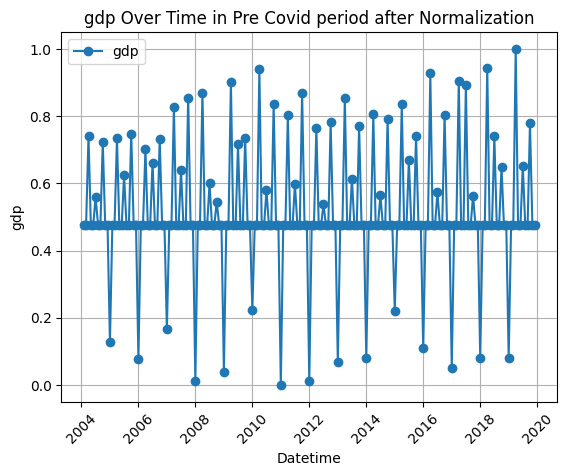

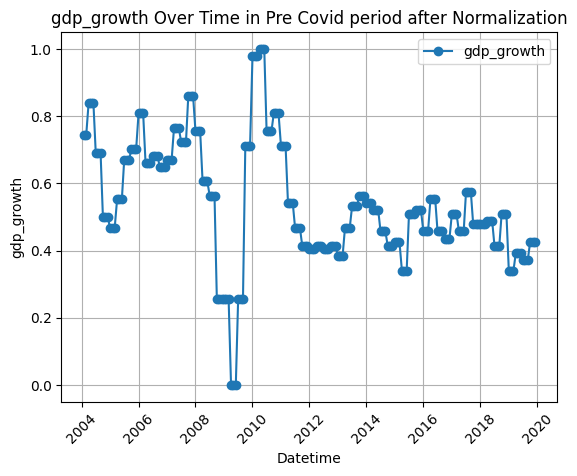

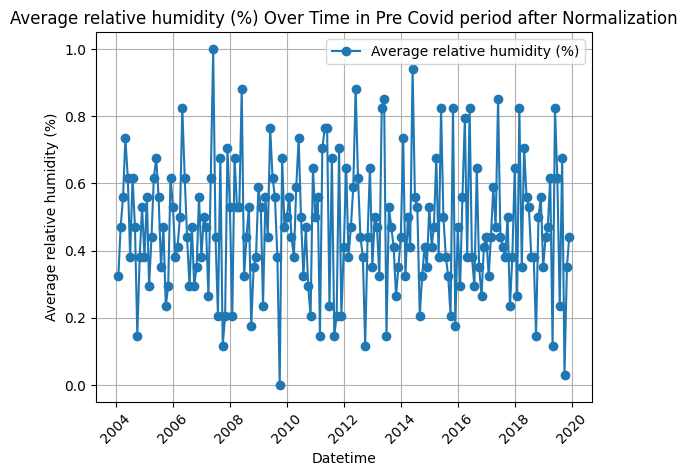

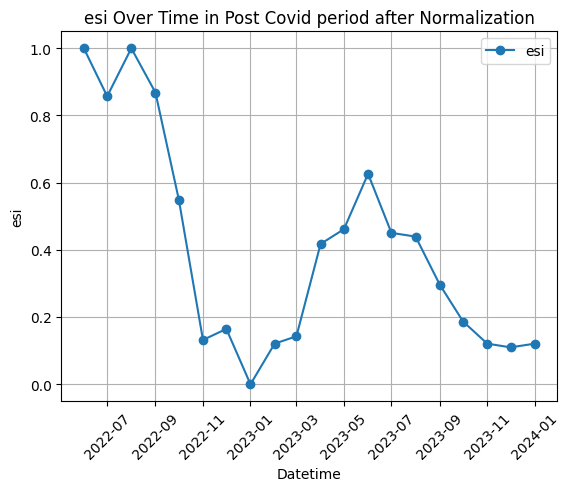

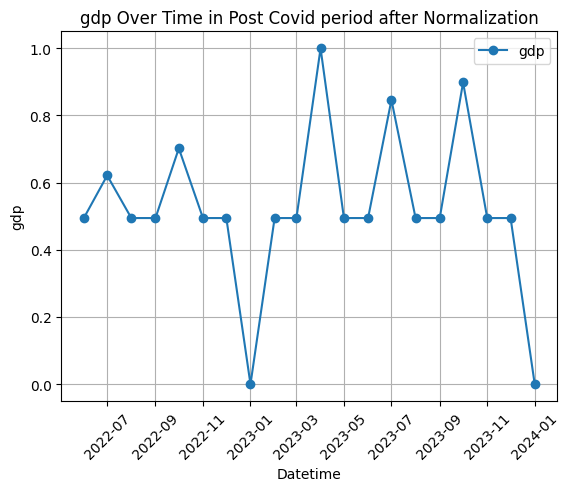

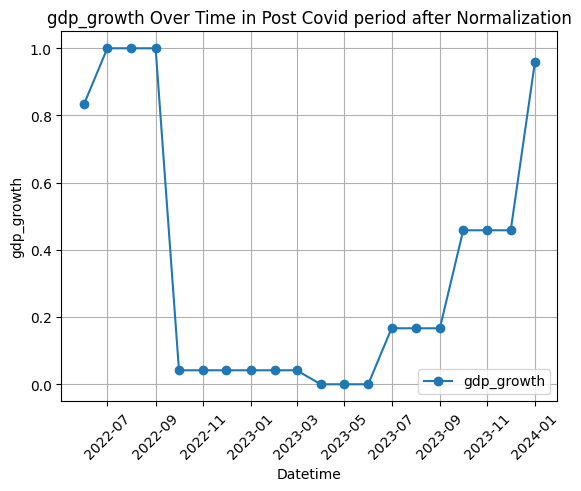

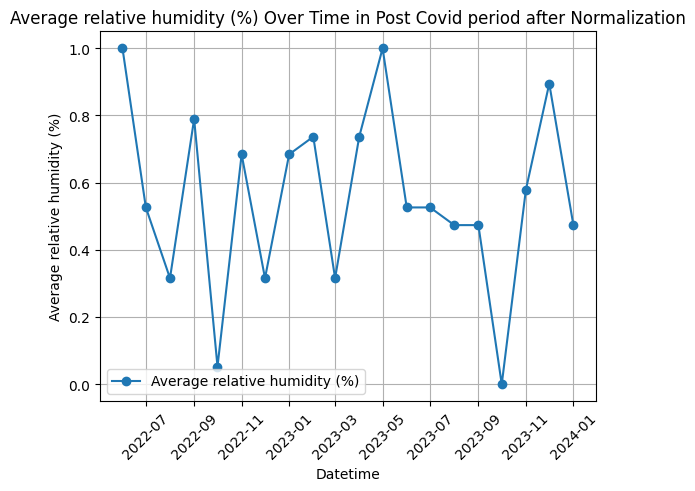

In [ ]:
def visualize_after_normalization(data, var):
    plt.plot(data.index, data[var], marker='o', linestyle='-', label=var)
    plt.title(var + ' Over Time in ' + data.name + ' after Normalization')
    plt.ylabel(var)
    plt.xlabel('Datetime')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

visualize_after_normalization(pre_covid_data, 'esi')
visualize_after_normalization(pre_covid_data, 'gdp')
visualize_after_normalization(pre_covid_data, 'gdp_growth')
visualize_after_normalization(pre_covid_data, 'Average relative humidity (%)')

visualize_after_normalization(post_covid_data, 'esi')
visualize_after_normalization(post_covid_data, 'gdp')
visualize_after_normalization(post_covid_data, 'gdp_growth')
visualize_after_normalization(post_covid_data, 'Average relative humidity (%)')

## 0.2.7 Exporting CVS Files

In [ ]:
# Export datasets to CSV
data.to_csv(export_cvs_path + 'data.csv', index=True)
no_covid_data.to_csv(export_cvs_path + 'no_covid_data.csv', index=True)
covid_data.to_csv(export_cvs_path + 'covid_data.csv', index=True)
pre_covid_data.to_csv(export_cvs_path + 'pre_covid_data.csv', index=True)
post_covid_data.to_csv(export_cvs_path + 'post_covid_data.csv', index=True)

# **1.0 Modelling**

In [ ]:
#tbd